<a href="https://colab.research.google.com/github/RoshanJamthe/Cardiovascular-risk-prediction-classifier/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

##Problem statement

### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.
## Data Description
####Demographic:
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

####Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

####Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

####Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

###Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV


# <b><u>Data Wrangling

## Dataset Loading

In [118]:
# Importing Data Wrangling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import time

import warnings
warnings.simplefilter("ignore")

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/ML/Cardiovascular risk prediction/data_cardiovascular_risk.csv")

In [121]:
# View the dataset
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0


> There are object type features they need to be converted into the numerical format

>There are missing values so those needs to be treated as well.

> The dependent feature 'TenYearCHD' is in required data type format



In [122]:
# Drop 'id' column
df.drop('id',axis=1,inplace=True)

In [123]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB




> Data has some null values.



In [124]:
# Describe the features
df.describe()

age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  3390.000000  3303.000000  3368.000000  3346.000000      3390.000000   
mean     49.542183     1.970936     9.069477     0.029886         0.006490   
std       8.592878     1.019081    11.879078     0.170299         0.080309   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol       sysBP        diaBP  \
count   3390.000000  3390.000000  3352.000000  3390.00000  3390.000000   
mean       0.315339     0.025664   237.074284   132.60118    82.883038   
std        0.464719     0.158153    45.247430    22.29203    12.023581   
min        0.000000     0.000000   107.000000    83.50000    48.000000   
25%        0.000000     0.000000   206.000000   117.00000    74.500000   
50%        0.000000     0.000000   234.000000   128.50000    82.000000   
75%        1.000000     0.000000   264.000000   144.00000    90.000000   
max        1.000000     1.000000   696.000000   295.00000   142.500000   

               BMI    heartRate      glucose   TenYearCHD  
count  3376.000000  3389.000000  3086.000000  3390.000000  
mean     25.794964    75.977279    82.086520     0.150737  
std       4.115449    11.971868    24.244753     0.357846  
min      15.960000    45.000000    40.000000     0.000000  
25%      23.020000    68.000000    71.000000     0.000000  
50%      25.380000    75.000000    78.000000     0.000000  
75%      28.040000    83.000000    87.000000     0.000000  
max      56.800000   143.000000   394.000000     1.000000

In [125]:
# Get unique values from each feature
def unique_values(df):
  for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print("-*-"*30)

unique_values(df)    

age : [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
education : [ 2.  4.  1.  3. nan]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
sex : ['F' 'M']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
is_smoking : ['YES' 'NO']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
cigsPerDay : [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
BPMeds : [ 0. nan  1.]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
prevalentStroke : [0 1]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-

* All the independent features are discrete in nature.

* There is no mismatched data 

## Check for Duplicated data 

In [126]:
df.duplicated().sum()

0



> The dataset has 0 duplicate rows




## Basic EDA

In [127]:
# Build a function to get [box_plot and dist_plot for continuous values feature] and [box_plot and bar_plot for discrete plot]
def get_eda(df,dependent_feature):
  for col in df.columns:

    # Continuous features
    if len(df[col].unique())>20:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(y=df[col])       # Box plot
      fig.set_title('',fontsize=17)
      fig.set_ylabel(col,fontsize=13)
      
      plt.subplot(1, 2, 2)
      fig = sns.distplot(df[col].dropna(),color='purple')  # Dist plot
      fig.set_ylabel('Frequency',fontsize=13)
      fig.set_xlabel(col,fontsize=13)
      plt.title(f'{col} Distribution',fontsize=17)
      plt.show()

    # Categorical features
    else:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(df[col],df[dependent_feature])  # Box plot
      fig.set_title('')
      fig.set_ylabel(dependent_feature,fontsize=13)

      plt.subplot(1, 2, 2)
      counts = df[col].value_counts().sort_index()
      counts.plot.bar(color='steelblue')              # Bar plot
      plt.xlabel(col,fontsize=13)
      plt.ylabel('count',fontsize=13)
      plt.title(f'count of {col}',fontsize=17)
      plt.show()      

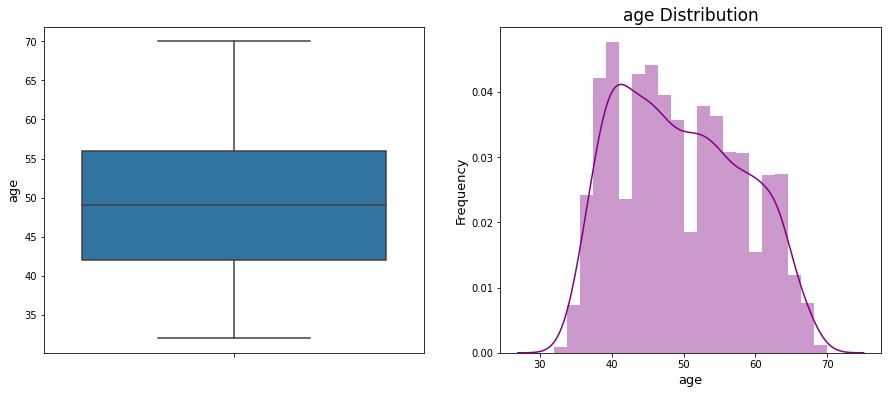

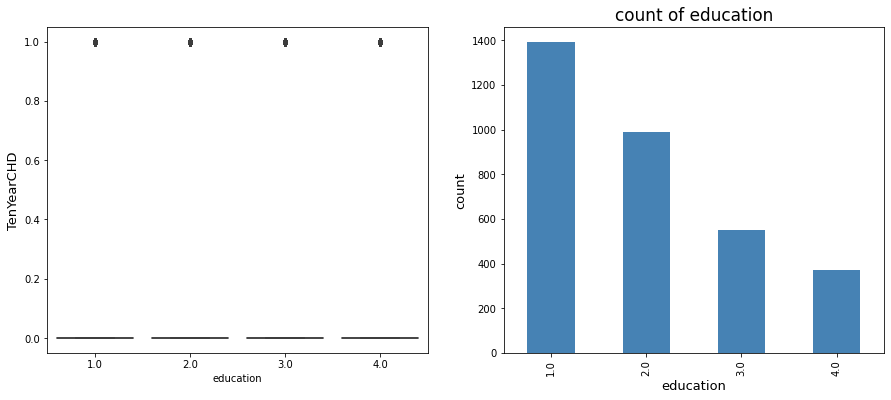

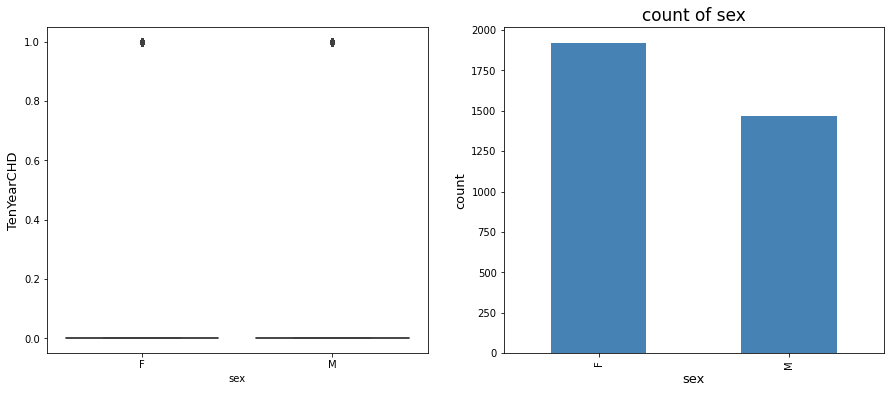

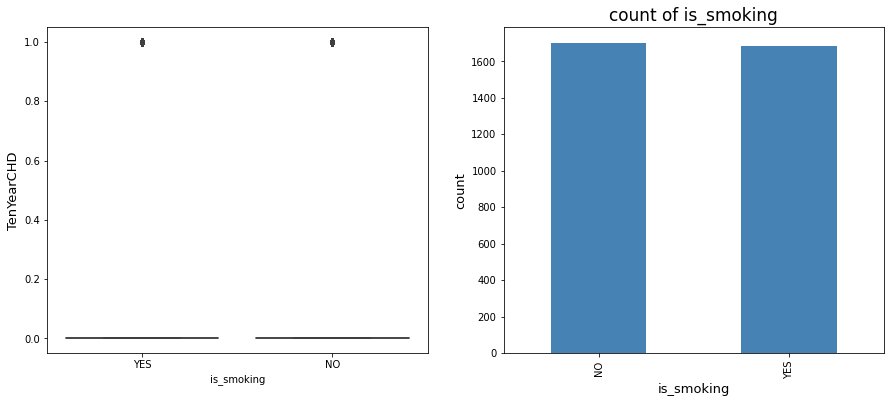

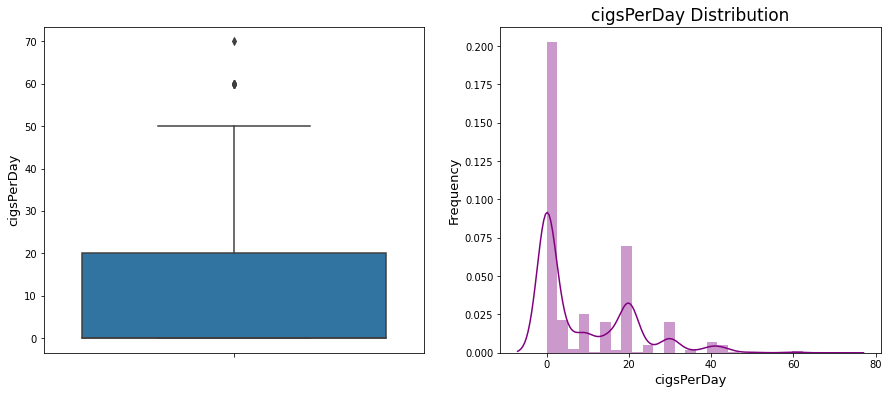

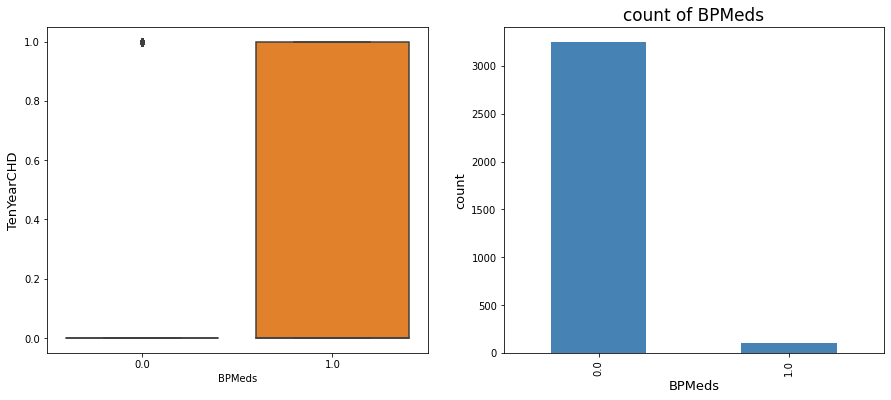

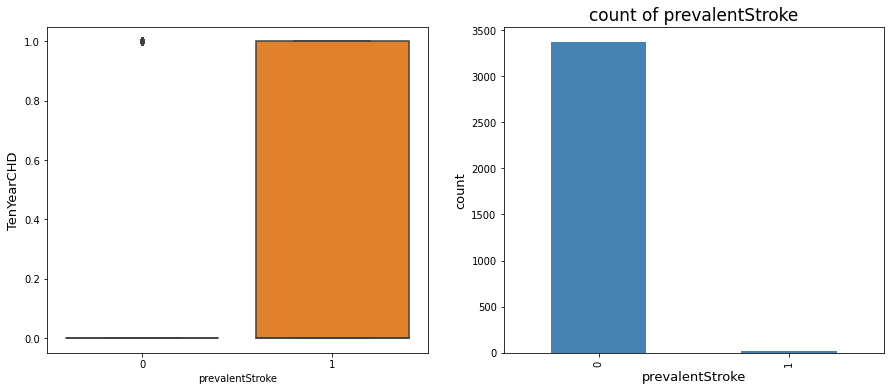

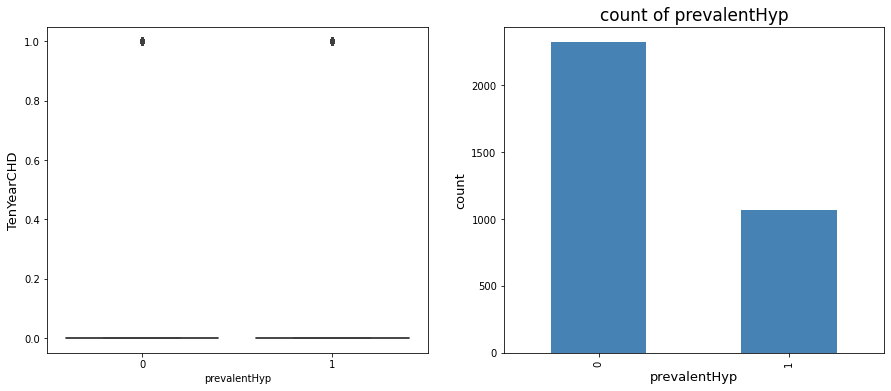

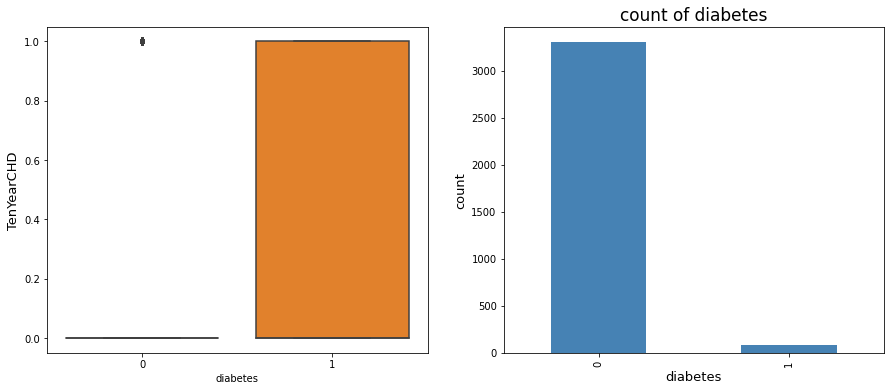

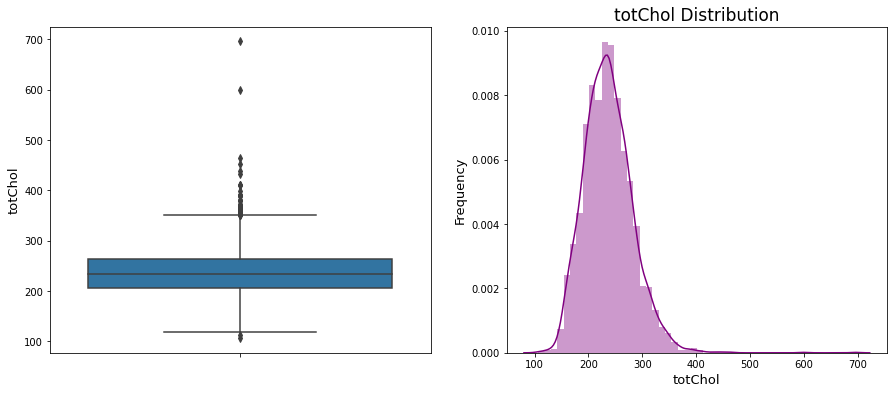

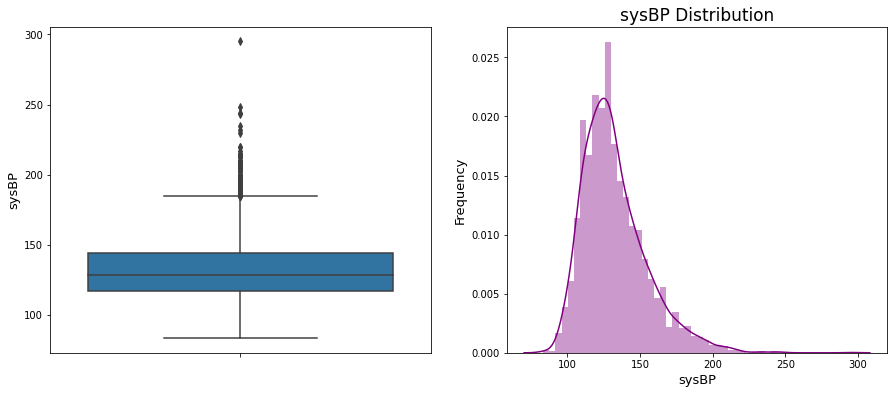

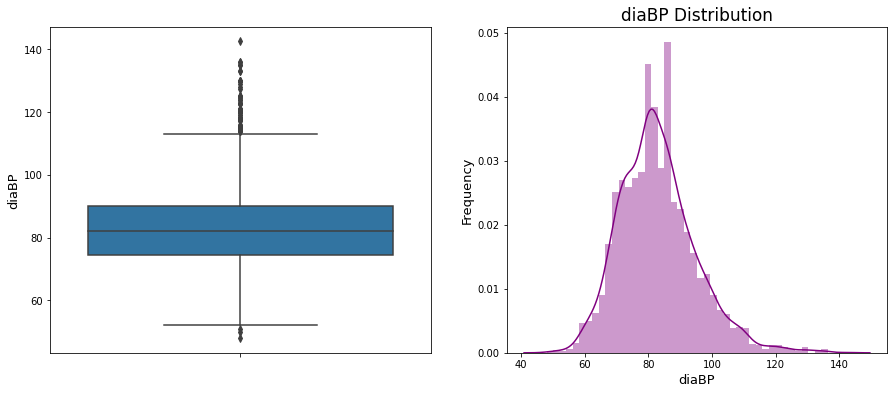

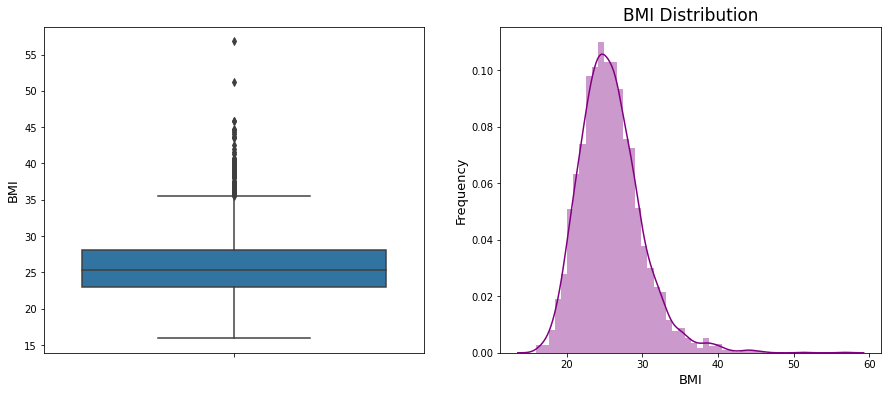

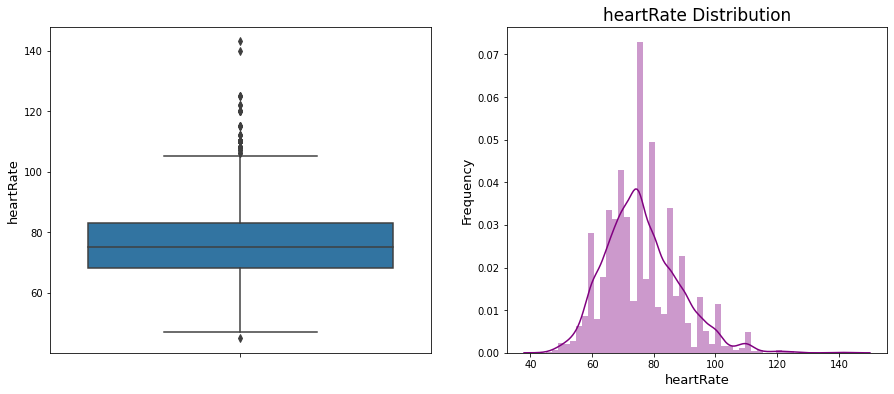

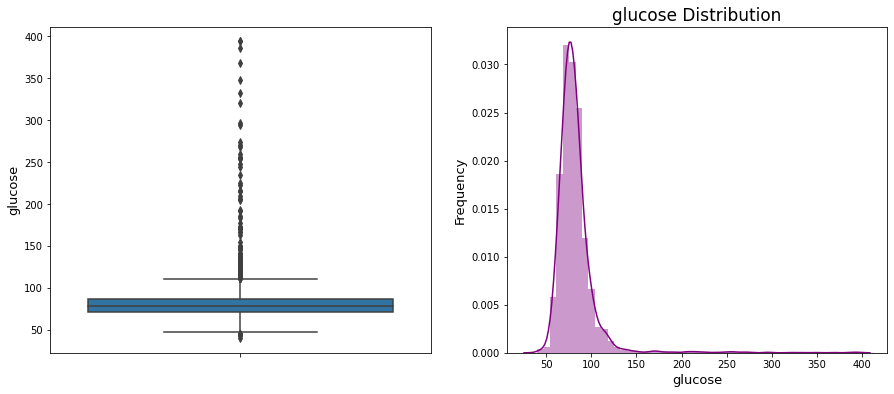

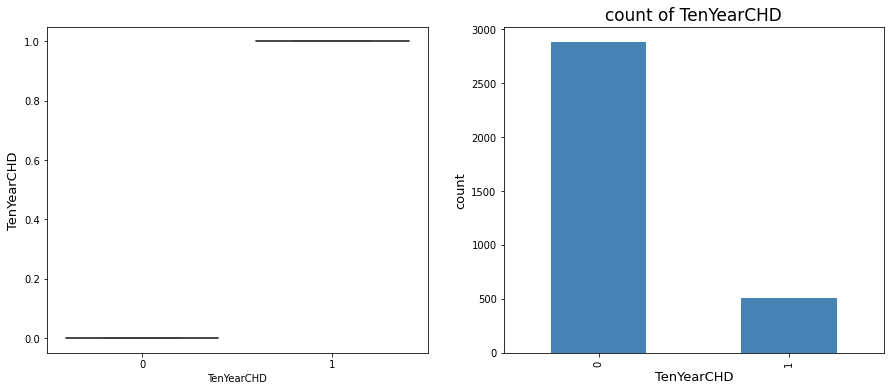

In [128]:
get_eda(df,'TenYearCHD')

### Feature Inspection

#### 'TenYearCHD'

The dataset is imbalanced

In [129]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [130]:
511/2879

0.17749218478638415

Maybe the algorithm can work around it and we don't need oversampling. 

####There are outliers in few features, but I suspect that these outliers are essential in determining the target feature.

Let's check!

In [131]:
# Build a function to get [box_plot and dist_plot for continuous values feature] and [box_plot and bar_plot for discrete plot]
def get_target_comp(df0,df1):
  for col in df0.columns:

    # Continuous features
    if len(df0[col].unique())>20:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.distplot(df0[col].dropna(),color='purple')  # Dist plot
      fig.set_ylabel('Frequency',fontsize=13)
      fig.set_xlabel(col,fontsize=13)
      plt.title(f'{col} Distribution, target=0',fontsize=17)
      
      plt.subplot(1, 2, 2)
      fig = sns.distplot(df1[col].dropna(),color='purple')  # Dist plot
      fig.set_ylabel('Frequency',fontsize=13)
      fig.set_xlabel(col,fontsize=13)
      plt.title(f'{col} Distribution, target=1',fontsize=17)
      plt.show()

    # Categorical features
    else:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      counts = df0[col].value_counts().sort_index()
      counts.plot.bar(color='steelblue')              # Bar plot
      plt.xlabel(col,fontsize=13)
      plt.ylabel('count',fontsize=13)
      plt.title(f'count of {col}, target=0',fontsize=17)

      plt.subplot(1, 2, 2)
      counts = df1[col].value_counts().sort_index()
      counts.plot.bar(color='steelblue')              # Bar plot
      plt.xlabel(col,fontsize=13)
      plt.ylabel('count',fontsize=13)
      plt.title(f'count of {col}, target=1',fontsize=17)
      plt.show()      

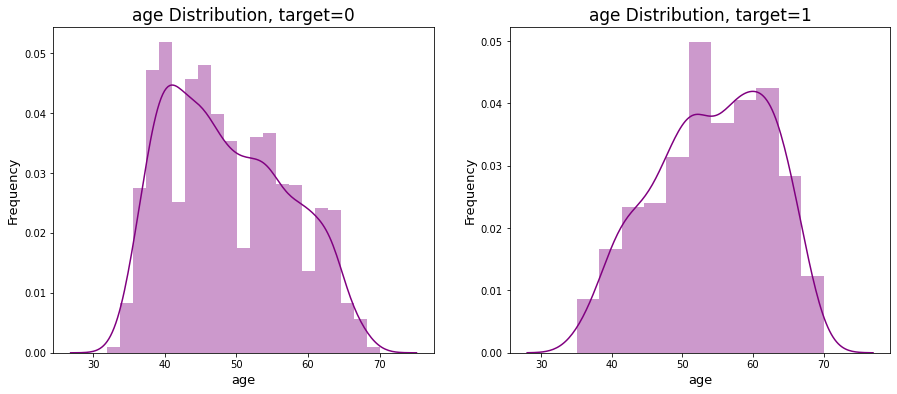

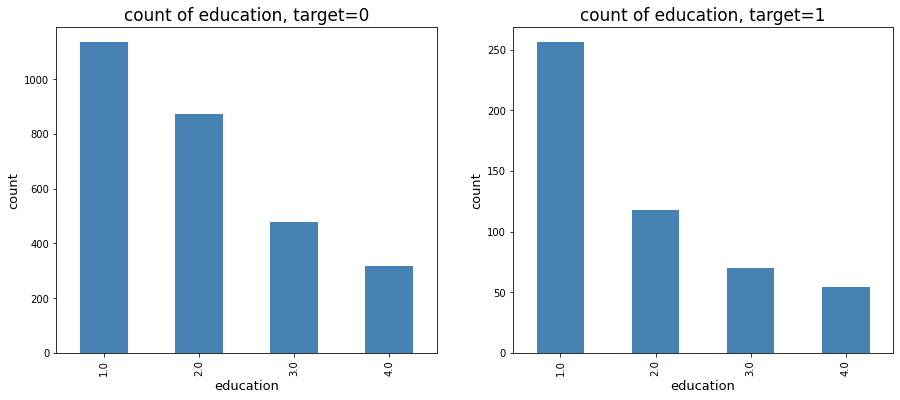

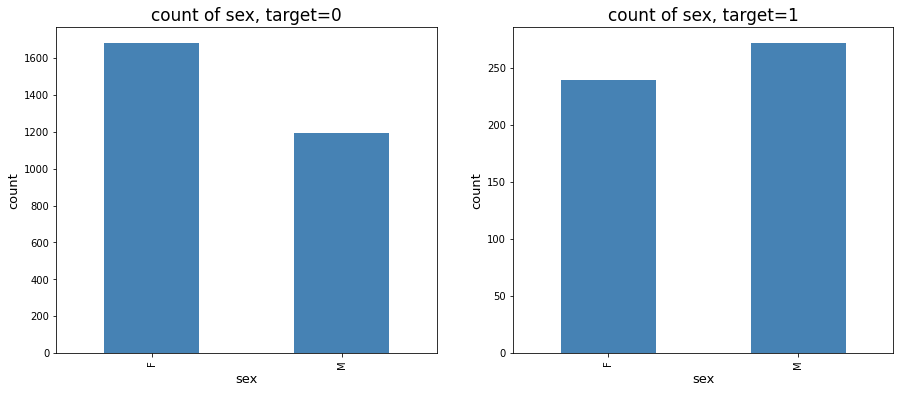

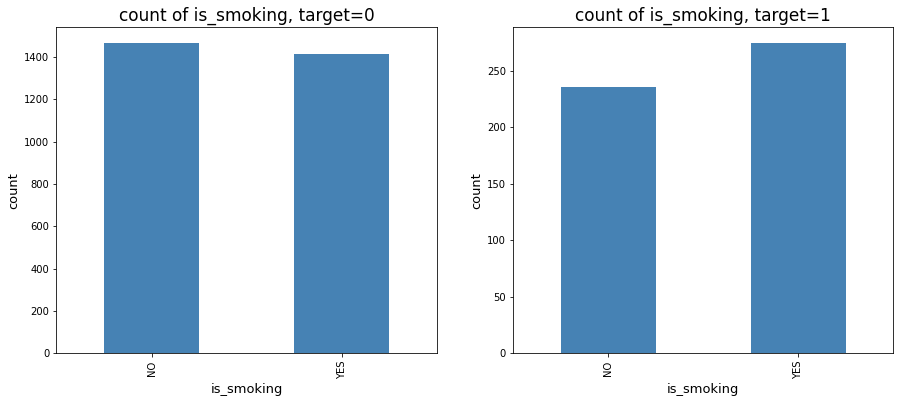

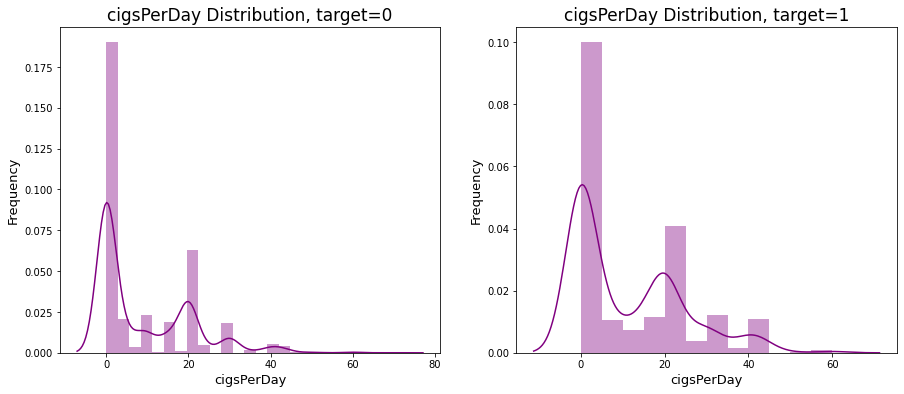

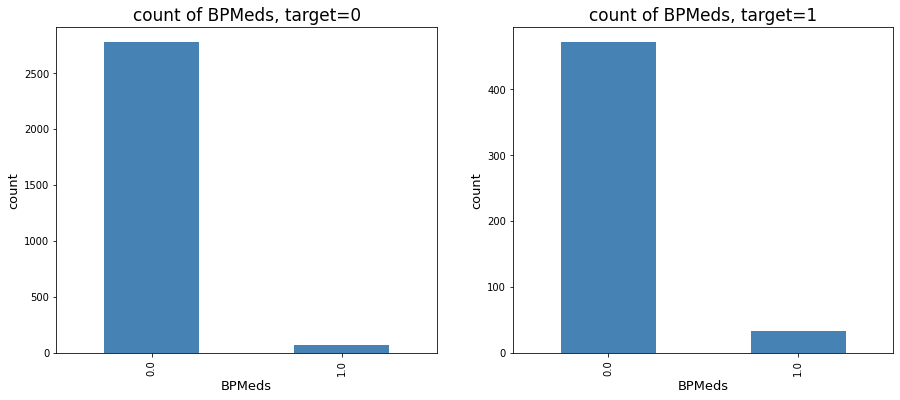

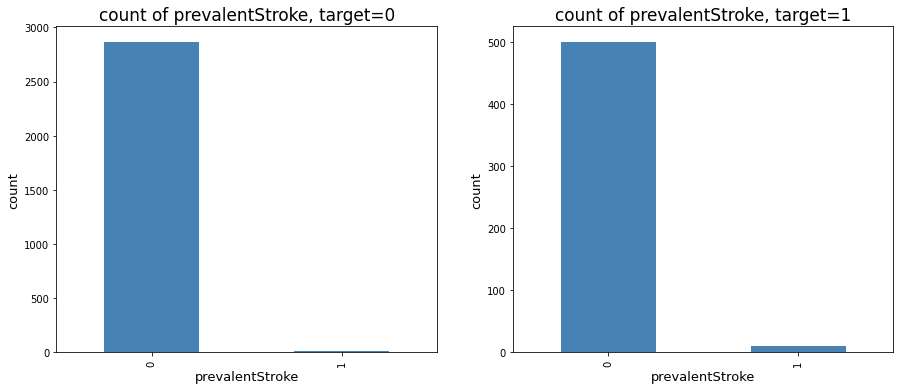

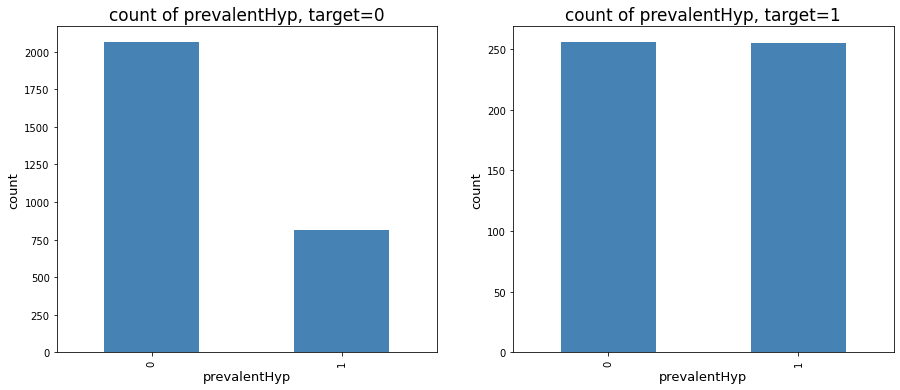

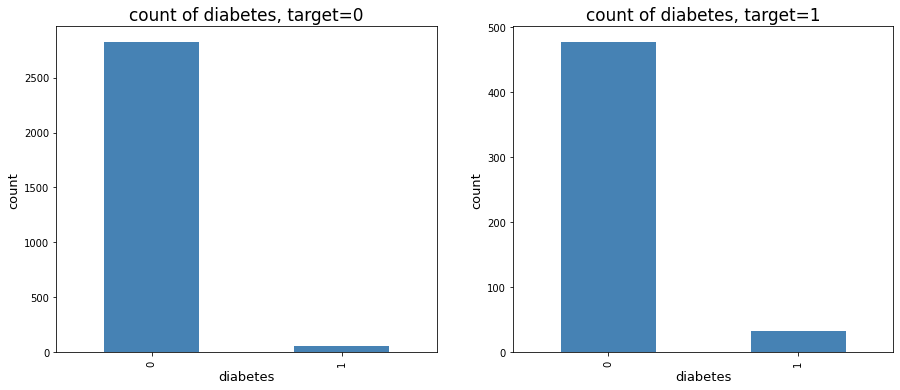

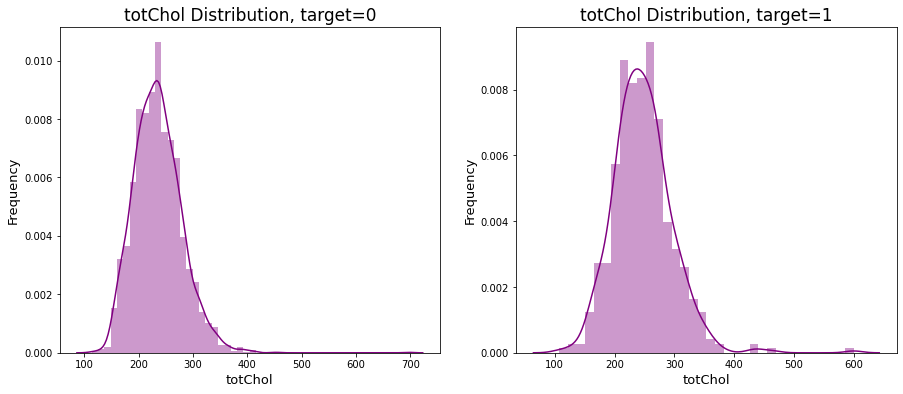

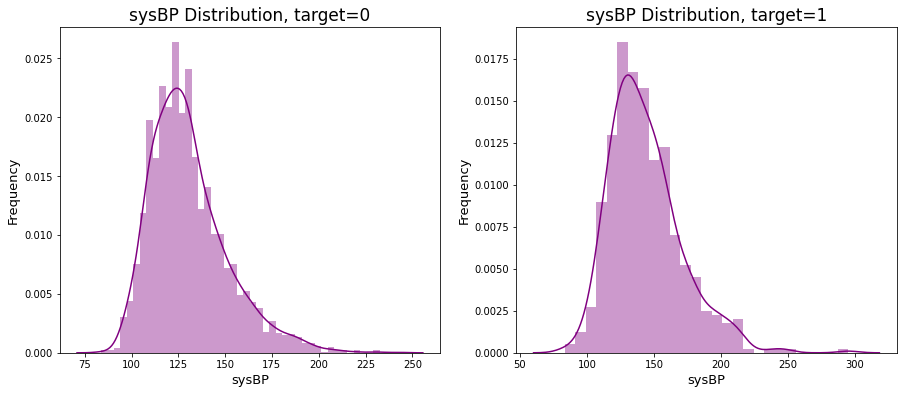

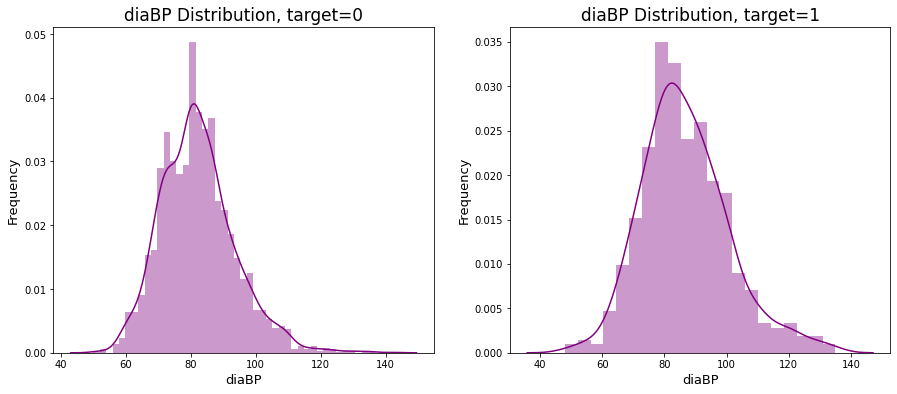

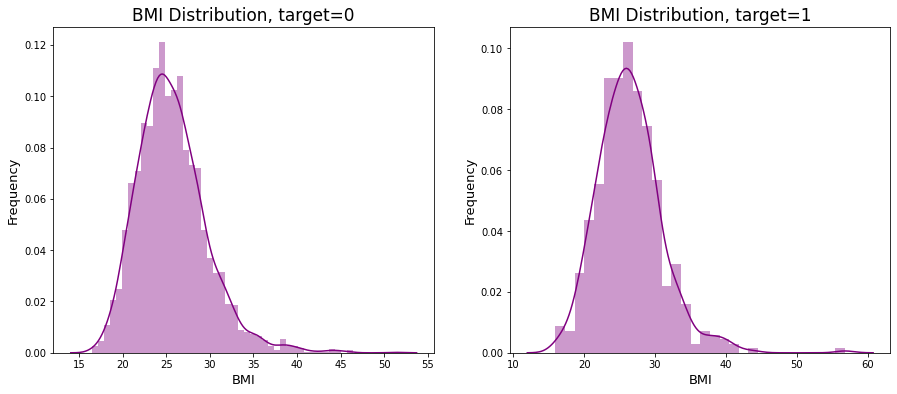

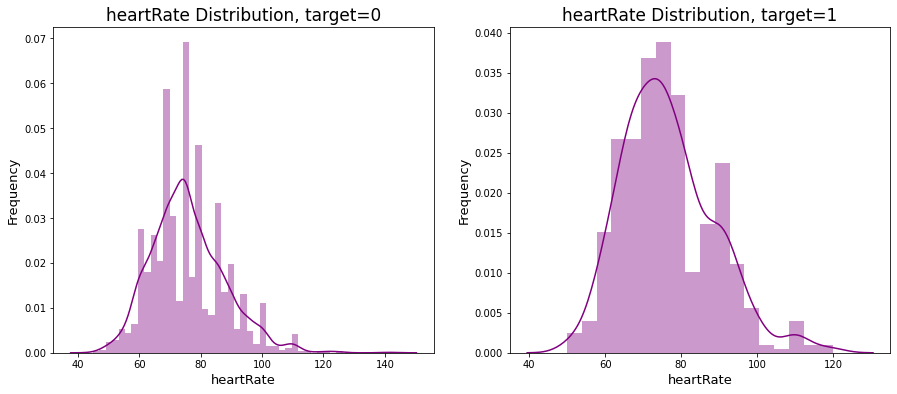

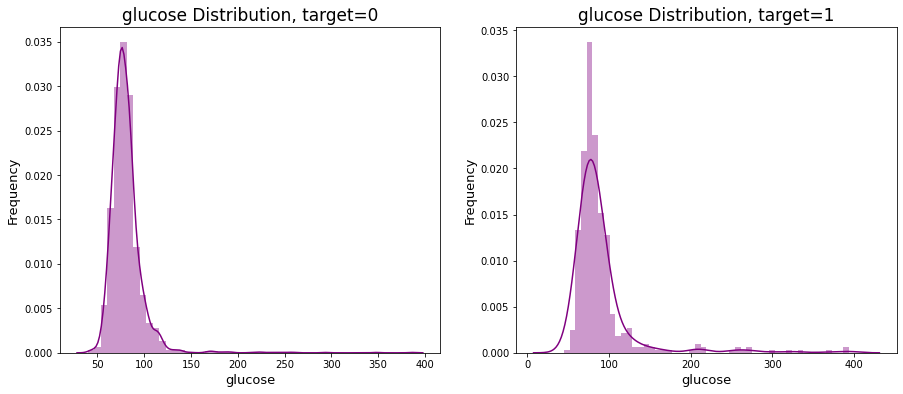

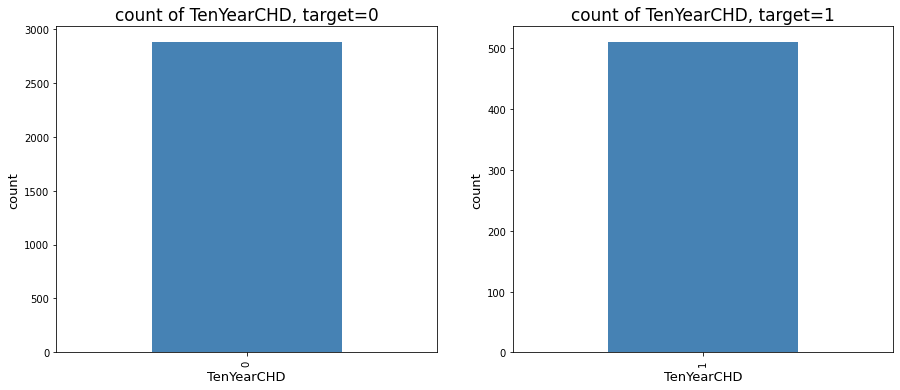

In [132]:
get_target_comp(df0=df[df['TenYearCHD']==0], df1=df[df['TenYearCHD']==1])

In [133]:
# 'cigsPerDay' feature has Upper Limit = 50
df[df['cigsPerDay']>50]['TenYearCHD'].value_counts()

0    7
1    2
Name: TenYearCHD, dtype: int64

In [134]:
# 'totChol' feature has Upper Limit = 350
df[df['totChol']>350]['TenYearCHD'].value_counts()

0    32
1    11
Name: TenYearCHD, dtype: int64

In [135]:
# 'sysBP' feature has Upper Limit = 180
df[df['sysBP']>180]['TenYearCHD'].value_counts()

0    82
1    49
Name: TenYearCHD, dtype: int64

In [136]:
# 'diaBP' feature has Upper Limit = 110
df[df['diaBP']>110]['TenYearCHD'].value_counts()

0    42
1    30
Name: TenYearCHD, dtype: int64

In [137]:
# 'BMI' feature has Upper Limit = 36
df[df['BMI']>36]['TenYearCHD'].value_counts()

0    53
1    17
Name: TenYearCHD, dtype: int64

In [138]:
# 'heartRate' feature has Upper Limit = 105
df[df['heartRate']>105]['TenYearCHD'].value_counts()

0    50
1    13
Name: TenYearCHD, dtype: int64

In [139]:
# 'glucose' feature has Upper Limit = 120
df[df['glucose']>120]['TenYearCHD'].value_counts()

0    42
1    39
Name: TenYearCHD, dtype: int64

* I conclude that outliers are essential in determining the target variable

## Handling missing/nan data

In [140]:
# This is one way to go about it
df_no_nan = df.dropna()
df_no_nan.reset_index(drop=True,inplace=True)
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2927 non-null   int64  
 1   education        2927 non-null   float64
 2   sex              2927 non-null   object 
 3   is_smoking       2927 non-null   object 
 4   cigsPerDay       2927 non-null   float64
 5   BPMeds           2927 non-null   float64
 6   prevalentStroke  2927 non-null   int64  
 7   prevalentHyp     2927 non-null   int64  
 8   diabetes         2927 non-null   int64  
 9   totChol          2927 non-null   float64
 10  sysBP            2927 non-null   float64
 11  diaBP            2927 non-null   float64
 12  BMI              2927 non-null   float64
 13  heartRate        2927 non-null   float64
 14  glucose          2927 non-null   float64
 15  TenYearCHD       2927 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 366.0+ KB


Or we can impute the missign values

In [141]:
# Missing Value Count Function for the dataframe
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()

    # Missing data counts and percentage
    print('Missing Data Count')
    print(df[missing].isnull().sum().sort_values(ascending = False))
    print('--'*50)
    print('Missing Data Percentage')
    print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))
    return missing

In [142]:
show_missing(df)

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

* All the features with missing values can be easily treated in this case. Hence, keeping all the column

### 'glucose'
'glucose' a continuous feature is positively skewed. Hence, imputing median values inplace of nan values

In [143]:
frames = [df[~df['glucose'].isna()], df[(df['glucose'].isna()) & (df['TenYearCHD']==0)].fillna(80), df[(df['glucose'].isna()) & (df['TenYearCHD']==1)].fillna(130)]

# join the dataframe
df = pd.concat(frames)

### 'education'
'education' a discrete feature has mode of 1.0.

In [144]:
df['education'] = df['education'].fillna(df['education'].mode()[0])

### 'totChol'
'totChol' a continuous feature is positively skewed. Hence, imputing median values inplace of nan values

In [145]:
frames = [df[~df['totChol'].isna()], df[(df['totChol'].isna()) & (df['TenYearCHD']==0)].fillna(200), df[(df['totChol'].isna()) & (df['TenYearCHD']==1)].fillna(300)]

# join the dataframe
df = pd.concat(frames)

### 'BPMeds'
'MPMeds' a discrete feature has mode of 0. But, it depends upon certain features so let's study it a further more and then take a decision

#### Finding 'BPMeds' dependencies

In [146]:
df[df['BPMeds'].isna()]

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
8      41        2.0   F        YES        20.0     NaN                0   
102    68        2.0   F         NO         0.0     NaN                0   
128    67        2.0   F         NO         0.0     NaN                0   
174    60        1.0   F         NO         0.0     NaN                0   
194    56        1.0   F         NO         0.0     NaN                0   
265    41        1.0   F         NO         0.0     NaN                0   
304    47        3.0   F        YES         9.0     NaN                0   
656    37        3.0   F         NO         0.0     NaN                0   
863    53        3.0   F         NO         0.0     NaN                0   
864    40        2.0   F         NO         0.0     NaN                0   
881    59        4.0   F         NO         0.0     NaN                0   
923    52        1.0   F         NO         0.0     NaN                0   
957    41        1.0   M        YES        15.0     NaN                0   
1069   54        4.0   M        YES        30.0     NaN                0   
1148   36        3.0   M        YES        20.0     NaN                0   
1288   45        3.0   M        YES        40.0     NaN                0   
1367   66        1.0   F         NO         0.0     NaN                0   
1374   57        1.0   F         NO         0.0     NaN                0   
1529   44        3.0   F        YES        20.0     NaN                0   
1700   58        1.0   M        YES        30.0     NaN                0   
1769   57        4.0   F         NO         0.0     NaN                0   
1794   59        1.0   F        YES        20.0     NaN                0   
1858   63        2.0   F         NO         0.0     NaN                0   
1862   65        1.0   F         NO         0.0     NaN                1   
1918   57        1.0   F         NO         0.0     NaN                0   
1919   45        2.0   M        YES        10.0     NaN                0   
1955   62        3.0   F         NO         0.0     NaN                0   
2044   43        3.0   F        YES        10.0     NaN                0   
2057   60        1.0   F         NO         0.0     NaN                0   
2159   61        1.0   F         NO         0.0     NaN                0   
2244   40        1.0   F        YES        50.0     NaN                0   
2435   48        2.0   F        YES        20.0     NaN                0   
2540   41        1.0   F        YES        20.0     NaN                0   
2644   65        2.0   F         NO         0.0     NaN                0   
2659   56        1.0   M        YES        20.0     NaN                0   
2906   57        4.0   M         NO         0.0     NaN                0   
2940   50        4.0   M        YES         9.0     NaN                0   
2956   59        1.0   F        YES         3.0     NaN                0   
3013   55        1.0   F         NO         0.0     NaN                0   
3201   66        1.0   F         NO         0.0     NaN                0   
3281   55        1.0   M        YES         3.0     NaN                0   
3388   60        1.0   M         NO         0.0     NaN                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
8                0         0    220.0  126.0   78.0  20.70       86.0   
102              0         0    257.0  144.0   95.0  29.25       80.0   
128              0         0    261.0  117.0   63.0  22.55       75.0   
174              1         0    273.0  176.0   84.0  22.17       66.0   
194              1         0    391.0  126.0   84.0  24.83       80.0   
265              0         0    179.0  121.0   83.0  23.04       66.0   
304              0         0    221.0  127.5   75.0  23.78       69.0   
656              0         0    145.0  105.0   73.0  23.44       58.0   
863              0         0    252.0  122.5   75.5  25.29       75.0   
864    

* Relate BPMeds with systolic BP

In [147]:
show_missing(df[df['BPMeds'].isna()])

Missing Data Count
BPMeds    42
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
BPMeds    100.0
dtype: float64


['BPMeds']

Needed to take care of 'totChol' first. That we did!

In [148]:
df[(df['BPMeds'].isna()) & (df['sysBP']>=170)]

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
174    60        1.0   F         NO         0.0     NaN                0   
881    59        4.0   F         NO         0.0     NaN                0   
923    52        1.0   F         NO         0.0     NaN                0   
1367   66        1.0   F         NO         0.0     NaN                0   
1769   57        4.0   F         NO         0.0     NaN                0   
2057   60        1.0   F         NO         0.0     NaN                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
174              1         0    273.0  176.0   84.0  22.17       66.0   
881              1         0    240.0  195.0  118.0  23.82       80.0   
923              1         0    252.0  208.0  136.0  25.79       92.0   
1367             1         1    203.0  205.0   83.0  28.27       75.0   
1769             1         0    328.0  181.0  112.5  27.05       85.0   
2057             1         0    231.0  174.0  110.0  25.05       85.0   

      glucose  TenYearCHD  
174      79.0           0  
881      73.0           0  
923      82.0           0  
1367    118.0           1  
1769     94.0           1  
2057     82.0           0

#### Fill na

#### Joining dataframes n droping nan rows fbased on 'BPMeds' column

In [149]:
df['BPMeds'].isna().sum()

42

In [150]:
frames = [df[~df['BPMeds'].isna()], df[(df['BPMeds'].isna()) & (df['prevalentHyp']==0)].fillna(0), df[(df['BPMeds'].isna()) & (df['prevalentHyp']==1)].fillna(1)]

# join the dataframe
df = pd.concat(frames)

In [151]:
# Dropping the rowns having NaN/NaT values
# under certain label
df = df.dropna(subset=['BPMeds'])

### 'cigsPerDay'
'cigsPerDay' a continuous feature is positively skewed. Hence, imputing median values inplace of nan values

In [152]:
df[df['cigsPerDay'].isna()]

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422    55        1.0   F        YES         NaN     0.0                0   
466    45        3.0   M        YES         NaN     0.0                0   
491    61        1.0   F        YES         NaN     0.0                0   
538    41        1.0   F        YES         NaN     0.0                0   
767    54        1.0   M        YES         NaN     0.0                0   
1461   47        2.0   F        YES         NaN     0.0                0   
1467   49        1.0   F        YES         NaN     0.0                0   
1597   57        1.0   F        YES         NaN     0.0                0   
1986   49        2.0   F        YES         NaN     0.0                0   
2087   49        4.0   M        YES         NaN     0.0                0   
2240   47        3.0   F        YES         NaN     0.0                0   
2284   45        2.0   M        YES         NaN     0.0                0   
2527   58        2.0   M        YES         NaN     0.0                0   
2638   57        1.0   M        YES         NaN     0.0                0   
2648   39        2.0   M        YES         NaN     0.0                0   
2879   42        1.0   M        YES         NaN     0.0                0   
2945   53        2.0   M        YES         NaN     0.0                0   
3301   55        1.0   M        YES         NaN     0.0                0   
3378   39        3.0   F        YES         NaN     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
422              1         0    213.0  163.0   91.0  28.66       69.0   
466              1         0    170.0  145.5   99.0  26.74       83.0   
491              1         0    356.0  168.0   98.0  27.30      103.0   
538              0         0    171.0  135.0   82.5  24.35       79.0   
767              0         0    219.0  110.0   72.0  26.05       95.0   
1461             0         0    365.0  127.0   76.0  24.44       72.0   
1467             0         0    252.0  123.0   69.0  21.45       72.0   
1597             0         0    229.0  115.0   69.0  24.43       80.0   
1986             1         0    233.0  158.0  102.0  25.31       90.0   
2087             0         0    256.0  127.5   81.5  28.21       93.0   
2240             0         0    321.0  132.0   88.0  28.14       90.0   
2284             0         0    248.0  121.0   72.0  27.88       64.0   
2527             0         0    235.0  127.5   76.0  21.02       81.0   
2638             0         0    223.0  107.5   72.5  24.74       62.0   
2648             0         0    285.0  121.0   82.0  27.62       85.0   
2879             0         0    226.0  119.0   80.0  25.29       62.0   
2945             0         0    276.0  130.0   86.0  24.21       58.0   
3301             0         0    214.0  132.5   85.5  29.25       70.0   
3378             0         0    197.0  126.5   76.5  19.71       55.0   

      glucose  TenYearCHD  
422      66.0           0  
466      85.0           0  
491     106.0           0  
538      82.0           0  
767      86.0           0  
1461     80.0           0  
1467     89.0           0  
1597     93.0           0  
1986     72.0           0  
2087     85.0           1  
2240     74.0           0  
2284     88.0           0  
2527    135.0           0  
2638    103.0           0  
2648     65.0           0  
2879     98.0           0  
2945     82.0           0  
3301    103.0           0  
3378     63.0           0

In [153]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

### 'BMI' and 'heartRate'
Both are continuous features with positively skewed distribution

In [154]:
frames = [df[~df['BMI'].isna()], df[(df['BMI'].isna()) & (df['TenYearCHD']==0)].fillna(24), df[(df['BMI'].isna()) & (df['TenYearCHD']==1)].fillna(35)]

# join the dataframe
df = pd.concat(frames)

In [155]:
frames = [df[~df['heartRate'].isna()], df[(df['heartRate'].isna()) & (df['TenYearCHD']==0)].fillna(70), df[(df['heartRate'].isna()) & (df['TenYearCHD']==1)].fillna(120)]

# join the dataframe
df = pd.concat(frames)

### Final check

In [156]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [157]:
df.duplicated().sum()

0

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 1 to 1388
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


## Feature engineering 

In [159]:
# View the dataset
df.head()

age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   36        4.0   M         NO         0.0     0.0                0   
2   46        1.0   F        YES        10.0     0.0                0   
3   50        1.0   M        YES        20.0     0.0                0   
4   64        1.0   F        YES        30.0     0.0                0   
5   61        3.0   F         NO         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   TenYearCHD  
1           0  
2           0  
3           1  
4           0  
5           1

In [160]:
df['sex'].unique()

array(['M', 'F'], dtype=object)

In [161]:
df['is_smoking'].unique()

array(['NO', 'YES'], dtype=object)

In [162]:
# Use a dictionary and replace function
encoders_nums = {
                  "sex":{"F":0,"M":1},
                 "is_smoking":{"YES":1,"NO":0}}

df = df.replace(encoders_nums)  

In [163]:
df = df.rename(columns={'TenYearCHD':'Target'})

In [164]:
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   36        4.0    1           0         0.0     0.0                0   
2   46        1.0    0           1        10.0     0.0                0   
3   50        1.0    1           1        20.0     0.0                0   
4   64        1.0    0           1        30.0     0.0                0   
5   61        3.0    0           0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   Target  
1       0  
2       0  
3       1  
4       0  
5       1

Great! Now we have all the data in numerical format

Next steps demands data to be in numerical format

Converting the continuous features to categorical type

In [165]:
df[df['heartRate']>90]['Target'].value_counts()

0    287
1     63
Name: Target, dtype: int64

In [166]:
df['avgBP'] = (df['sysBP']+df['diaBP'])/2

In [167]:
df.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [168]:
#df['avgBP'] = df['avgBP'].apply(lambda x: 1 if x>115 else 0) 

#df['totChol'] = df['totChol'].apply(lambda x: 1 if x>=240 else 0) 

#df['BMI'] = df['BMI'].apply(lambda x: 1 if x>=30 else (0 if x>=13.5 else 1))

#df['heartRate'] = df['heartRate'].apply(lambda x: 1 if x>100 else (0 if x>35 else 1))

#df['glucose'] = df['glucose'].apply(lambda x: 1 if x>126 else (0 if x>60 else 1))  # converting to categorical features didn't work

In [169]:
df.head()

age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   36        4.0    1           0         0.0     0.0                0   
2   46        1.0    0           1        10.0     0.0                0   
3   50        1.0    1           1        20.0     0.0                0   
4   64        1.0    0           1        30.0     0.0                0   
5   61        3.0    0           0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol    BMI  heartRate  glucose  Target   avgBP  
1             1         0    212.0  29.77       72.0     75.0       0  133.00  
2             0         0    250.0  20.35       88.0     94.0       0   93.50  
3             1         0    233.0  28.26       68.0     94.0       1  123.00  
4             0         0    241.0  26.42       70.0     77.0       0  110.75  
5             1         0    272.0  32.80       85.0     65.0       1  151.50

In [170]:
df.drop('cigsPerDay',axis=1,inplace=True)

## Handling multicollinearity

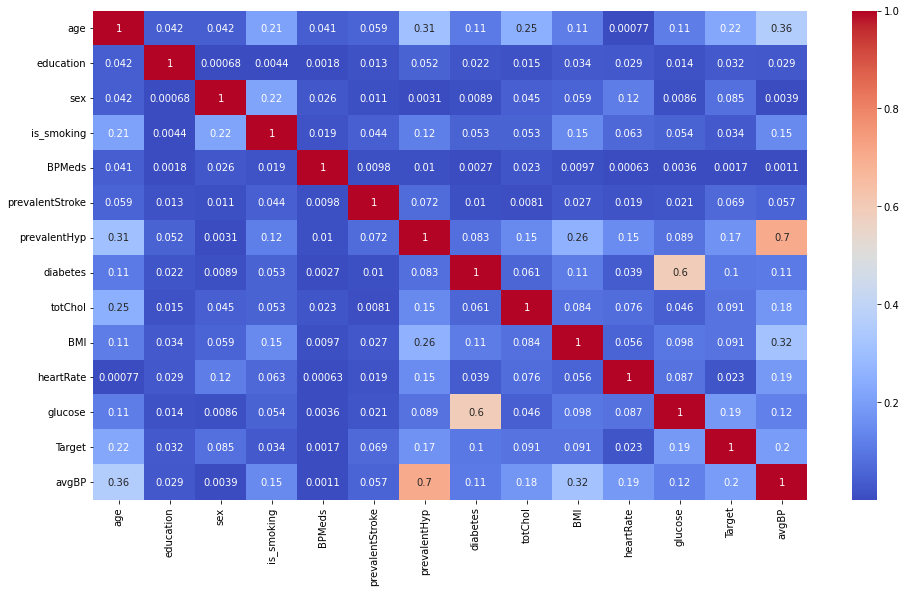

In [171]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(16,9))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

### Multicollinearity check

In [172]:
# import variance_inflation_factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [173]:
# Create a function to return VIF value for that feature
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame() # create a DataFrame where we will add feature and its respective vif value
    vif["variables"] = X.columns # Variable feature in vif dataframe will have columns from X i.e. input
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # vif value for that column 
    return(vif)

In [174]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Target']]])

variables        VIF
0               age  38.695905
1         education   1.369324
2               sex   1.894576
3        is_smoking   2.200245
4            BPMeds   1.007190
5   prevalentStroke   1.015979
6      prevalentHyp   2.255609
7          diabetes   1.522318
8           totChol  26.906433
9               BMI  30.019562
10        heartRate  37.332482
11          glucose  19.345079
12            avgBP  79.137524

### Sneak peek at feature importances
To check whether we can do feature selection since some of the features are having high vif values

In [175]:
!pip install skfeature-chappers

In [176]:
def fisher_feature(df,x,y):
  from skfeature.function.similarity_based import fisher_score
  import matplotlib.pyplot as plt
  %matplotlib inline
  # Calculating Scores
  ranks= fisher_score.fisher_score(x,y)
  #plotting the ranks
  feat_importances= pd.Series(ranks,df.columns[0:len(df.columns)-1])
  feat_importances.sort_values(ascending=True).plot(kind='barh', color='teal')
  plt.show()

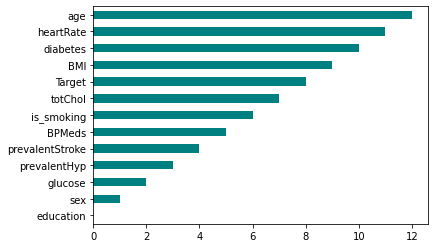

In [177]:
fisher_feature(df,df.drop('Target',axis=1).to_numpy(),df['Target']) # X.to_numpy() is important the length of both X and Y should be same

In [178]:
df.shape

(3390, 14)

In [179]:
df.duplicated().sum()

0

In [180]:
df= df.drop_duplicates()

In [181]:
df.shape

(3390, 14)

# <b><u>Build ML models

## Pre-processing

###train_test_split

In [182]:
df.head()

age  education  sex  is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
1   36        4.0    1           0     0.0                0             1   
2   46        1.0    0           1     0.0                0             0   
3   50        1.0    1           1     0.0                0             1   
4   64        1.0    0           1     0.0                0             0   
5   61        3.0    0           0     0.0                0             1   

   diabetes  totChol    BMI  heartRate  glucose  Target   avgBP  
1         0    212.0  29.77       72.0     75.0       0  133.00  
2         0    250.0  20.35       88.0     94.0       0   93.50  
3         0    233.0  28.26       68.0     94.0       1  123.00  
4         0    241.0  26.42       70.0     77.0       0  110.75  
5         0    272.0  32.80       85.0     65.0       1  151.50

In [183]:
from sklearn.preprocessing import MinMaxScaler

In [184]:
scalar = MinMaxScaler()

In [185]:
X = pd.DataFrame(scalar.fit_transform(df.drop('Target',axis=1)),columns=df.drop('Target',axis=1).columns)

y = df['Target']

In [186]:
X.head()

age  education  sex  is_smoking  BPMeds  prevalentStroke  \
0  0.105263   0.037975  1.0         0.0     0.0              0.0   
1  0.368421   0.000000  0.0         1.0     0.0              0.0   
2  0.473684   0.000000  1.0         1.0     0.0              0.0   
3  0.842105   0.000000  0.0         1.0     0.0              0.0   
4  0.763158   0.025316  0.0         0.0     0.0              0.0   

   prevalentHyp  diabetes   totChol       BMI  heartRate   glucose     avgBP  
0           1.0       0.0  0.214286  0.121098   0.275510  0.098870  0.441227  
1           0.0       0.0  0.275974  0.038495   0.438776  0.152542  0.172061  
2           1.0       0.0  0.248377  0.107857   0.234694  0.152542  0.373083  
3           0.0       0.0  0.261364  0.091722   0.255102  0.104520  0.289608  
4           1.0       0.0  0.311688  0.147667   0.408163  0.070621  0.567291

In [187]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state=0)

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(2712, 13) (2712,)
(678, 13) (678,)


In [188]:
y_train.value_counts()

0    2291
1     421
Name: Target, dtype: int64

In [189]:
y_test.value_counts()

0    588
1     90
Name: Target, dtype: int64

### Importing all the libraries needed

In [190]:
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [191]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

In [192]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

In [193]:
from skopt import BayesSearchCV
import time
import shap

### Creating functions to reduce number of lines of code

#### individual_model_performance(model_name,X_train,X_test,y_train,y_test)

In [194]:
# Get the accuracy score for the model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

#### get_confusion_matrix(model_name, X_train, X_test, y_train, y_test)

In [195]:
# Get the confusion matrix for both train and test
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## <b><u>Logistic regression model 

### WIthout regularization

In [196]:
# Fitting the LogisticRegression on train data
clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train)

LogisticRegression()

In [197]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [198]:
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8502949852507374, 0.8702064896755162)

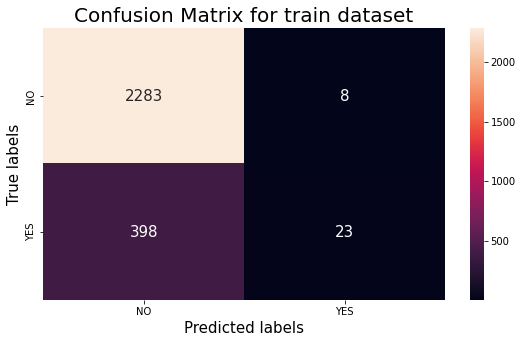

In [199]:
get_confusion_matrix(clf,X_train,y_train,'train')

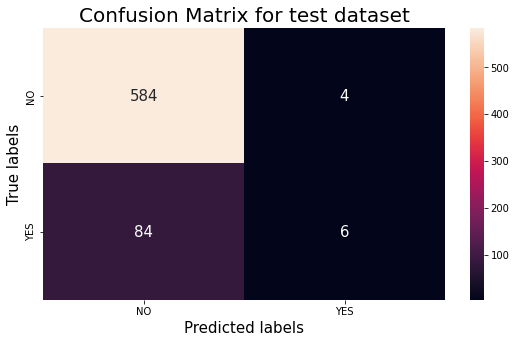

In [200]:
get_confusion_matrix(clf,X_test,y_test,'test')

In [201]:
clf.intercept_

array([-4.67062611])

In [202]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Target',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Absolute coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [203]:
feature_coefficients(clf,X_train)

Features      Coef  Absolute coef
0           glucose  3.173764       3.173764
1               age  2.327496       2.327496
2             avgBP  1.721121       1.721121
3           totChol  1.191560       1.191560
4   prevalentStroke  1.001275       1.001275
5         education -0.659981       0.659981
6               BMI  0.635809       0.635809
7        is_smoking  0.479683       0.479683
8               sex  0.477564       0.477564
9      prevalentHyp  0.284470       0.284470
10         diabetes  0.235189       0.235189
11        heartRate -0.190223       0.190223
12           BPMeds -0.080786       0.080786

In [204]:
# Get model performance using function I built, model_performance
individual_model_performance(clf,X_train,X_test,y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.101770                  0.120000
1   Accuracy                   0.850295                  0.870206
2     Recall                   0.054632                  0.066667
3  Precision                   0.741935                  0.600000
4   log_loss                   5.170630                  4.482914
5    roc_auc                   0.525570                  0.529932

It's a poor model 

### With lasso regularization

In [205]:
start = time. time()

lasso = LogisticRegression(penalty='l1',solver='liblinear', fit_intercept=True, max_iter=10000)

lasso_bayes = BayesSearchCV(estimator=lasso, search_spaces={'C':(0.0001,10)}, n_iter=30, cv = 3, verbose=2, scoring='recall')

# Fit the data
lasso_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ................................C=6.931160910040206; total time=   0.0s
[CV] END ................................C=6.931160910040206; total time=   0.1s
[CV] END ................................C=6.931160910040206; total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..............................C=0.46035098027879945; total time=   0.0s
[CV] END ..............................C=0.46035098027879945; total time=   0.0s
[CV] END ..............................C=0.46035098027879945; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ................................C=4.219758750236245; total time=   0.1s
[CV] END ................................C=4.219758750236245; total time=   0.1s
[CV] END ................................C=4.219758750236245; total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..........................

In [206]:
lasso_bayes.best_estimator_

LogisticRegression(C=7.842707370532419, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [207]:
lasso_bayes_optimal = lasso_bayes.best_estimator_

#### Performance check

In [208]:
lasso_bayes_optimal.score(X_train,y_train), lasso_bayes_optimal.score(X_test,y_test)

(0.8502949852507374, 0.8687315634218289)

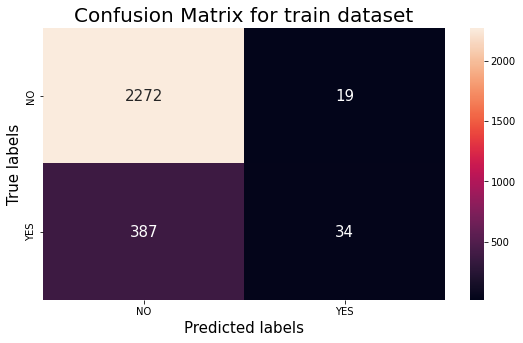

In [209]:
get_confusion_matrix(lasso_bayes_optimal,X_train,y_train,'train')

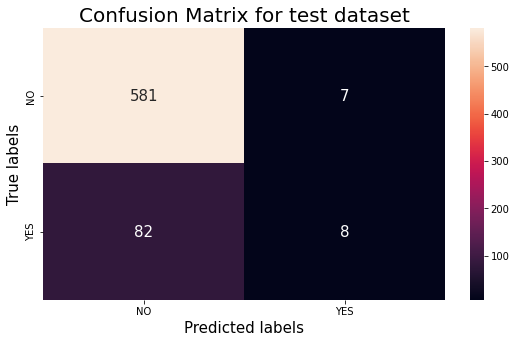

In [210]:
get_confusion_matrix(lasso_bayes_optimal,X_test,y_test,'test')

In [211]:
feature_coefficients(lasso_bayes_optimal,X_train)

Features      Coef  Absolute coef
0           glucose  6.087102       6.087102
1         education -3.172024       3.172024
2               age  2.425962       2.425962
3             avgBP  2.248425       2.248425
4           totChol  1.828586       1.828586
5   prevalentStroke  1.299551       1.299551
6               BMI  1.181372       1.181372
7        is_smoking  0.514936       0.514936
8               sex  0.497631       0.497631
9          diabetes -0.463903       0.463903
10        heartRate -0.406968       0.406968
11     prevalentHyp  0.165510       0.165510
12           BPMeds  0.000000       0.000000

In [212]:
# Get model performance using function I built, model_performance
individual_model_performance(lasso_bayes_optimal,X_train,X_test,y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.143460                  0.152381
1   Accuracy                   0.850295                  0.868732
2     Recall                   0.080760                  0.088889
3  Precision                   0.641509                  0.533333
4   log_loss                   5.170634                  4.533859
5    roc_auc                   0.536233                  0.538492

Still a poor model, Recall is important here

## <b><u>Random Forest Classifier model

### Training a Random Forest Classifier

In [213]:
rf_model = RandomForestClassifier(max_depth=50, min_samples_leaf=10,min_samples_split=10,n_jobs=2)
rf_model.fit(X_train,y_train)
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8502949852507374, 0.8702064896755162)

In [214]:
start = time. time()

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
# Grid search
rf_bayes= BayesSearchCV(estimator=rf_model,
                       search_spaces = {'max_depth': (5,50),
                                    'min_samples_leaf': (5,150),
                                    'min_samples_split': (5,150)}, n_iter=50,
                       cv = 3, verbose=2, scoring='recall')
# Fit the data
rf_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=9, min_samples_leaf=19, min_samples_split=144; total time=   0.3s
[CV] END max_depth=9, min_samples_leaf=19, min_samples_split=144; total time=   0.3s
[CV] END max_depth=9, min_samples_leaf=19, min_samples_split=144; total time=   0.3s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=24, min_samples_leaf=93, min_samples_split=110; total time=   0.2s
[CV] END max_depth=24, min_samples_leaf=93, min_samples_split=110; total time=   0.2s
[CV] END max_depth=24, min_samples_leaf=93, min_samples_split=110; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=19, min_samples_leaf=125, min_samples_split=83; total time=   0.2s
[CV] END max_depth=19, min_samples_leaf=125, min_samples_split=83; total time=   0.2s
[CV] END max_depth=19, min_samples_leaf=125, min_samples_split=83; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 

In [215]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_leaf=5, min_samples_split=5)

In [216]:
rf_bayes_optimal = rf_bayes.best_estimator_

### Performance check

In [217]:
rf_bayes_optimal.score(X_train,y_train),rf_bayes_optimal.score(X_test,y_test)

(0.8768436578171092, 0.8790560471976401)

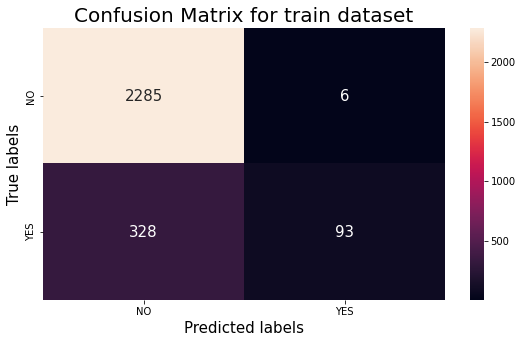

In [218]:
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

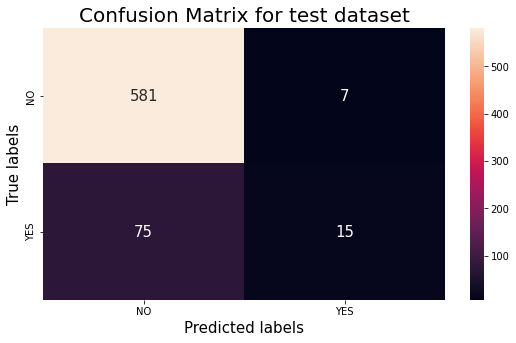

In [219]:
get_confusion_matrix(rf_bayes_optimal,X_test,y_test,'test')

In [220]:
individual_model_performance(rf_bayes_optimal, X_train, X_test, y_train, y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.357692                  0.267857
1   Accuracy                   0.876844                  0.879056
2     Recall                   0.220903                  0.166667
3  Precision                   0.939394                  0.681818
4   log_loss                   4.253671                  4.177264
5    roc_auc                   0.609142                  0.577381

In [221]:
def get_feature_importance(model_name,X_train):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : df.drop('Target',axis=1).columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [222]:
rf_feature_importance = get_feature_importance(rf_bayes_optimal,X_train)
rf_feature_importance

Feature  Feature Importance
0           glucose               0.236
1               age               0.160
2             avgBP               0.151
3               BMI               0.122
4           totChol               0.117
5         heartRate               0.091
6         education               0.034
7               sex               0.027
8      prevalentHyp               0.024
9        is_smoking               0.022
10         diabetes               0.010
11           BPMeds               0.005
12  prevalentStroke               0.003

### Model Interpretation

#### Summary Plot - Impact of features on predictions at global level

In [223]:
def get_summary_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance)

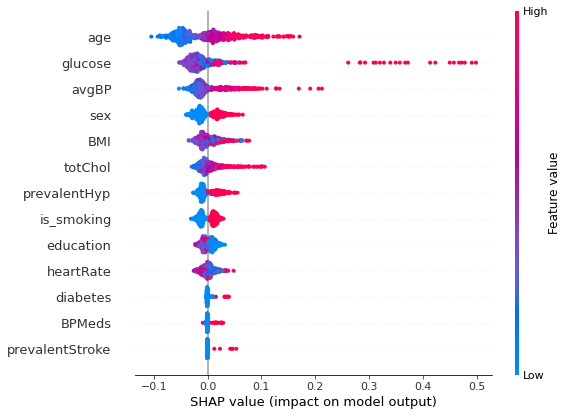

In [224]:
get_summary_plot(rf_bayes_optimal,X_test)

In [225]:
 def get_summary_bar_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance, plot_type='bar') 

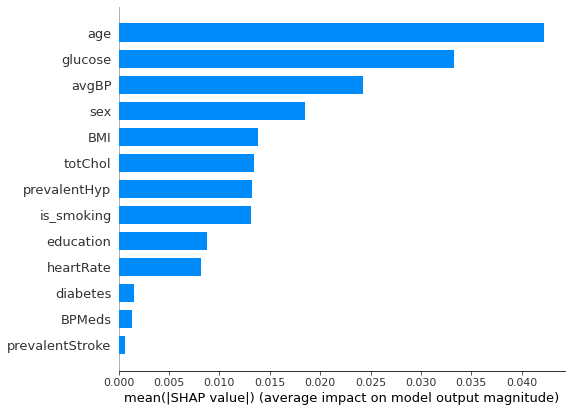

In [226]:
get_summary_bar_plot(rf_bayes_optimal,X_test)

## <b><u>XGBClassifier model

### Training a XGB Classifier

In [227]:
start = time. time()

# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(subsample=0.9, colsample_bytree =0.4,random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'max_depth': (5,25),
                                    'min_samples_weight': (0.9,1),
                                    'reg_alpha':(0.1,10), 'gamma':(0.1,1)}, n_iter=50,
                       cv = 4, verbose=2, scoring='recall')
# Fit the data
xgb_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.9994777882406568, max_depth=20, min_samples_weight=0.9157998032894688, reg_alpha=4.720061054305032; total time=   0.3s
[CV] END gamma=0.9994777882406568, max_depth=20, min_samples_weight=0.9157998032894688, reg_alpha=4.720061054305032; total time=   0.2s
[CV] END gamma=0.9994777882406568, max_depth=20, min_samples_weight=0.9157998032894688, reg_alpha=4.720061054305032; total time=   0.2s
[CV] END gamma=0.9994777882406568, max_depth=20, min_samples_weight=0.9157998032894688, reg_alpha=4.720061054305032; total time=   0.2s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.5021877688432712, max_depth=19, min_samples_weight=0.9093767060329833, reg_alpha=5.576774370799128; total time=   0.2s
[CV] END gamma=0.5021877688432712, max_depth=19, min_samples_weight=0.9093767060329833, reg_alpha=5.576774370799128; total time=   0.2s
[CV] END gamma=0.5021877688432712, max_depth=19, min_samples_weigh

In [228]:
xgb_bayes.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.9979089420015751, max_depth=25,
              min_samples_weight=0.9323581470664262,
              reg_alpha=1.4736560837124657, subsample=0.9)

In [229]:
xgb_bayes_optimal = xgb_bayes.best_estimator_

### Performance check

In [230]:
xgb_bayes_optimal.score(X_train,y_train),xgb_bayes_optimal.score(X_test,y_test)

(0.9100294985250738, 0.8790560471976401)

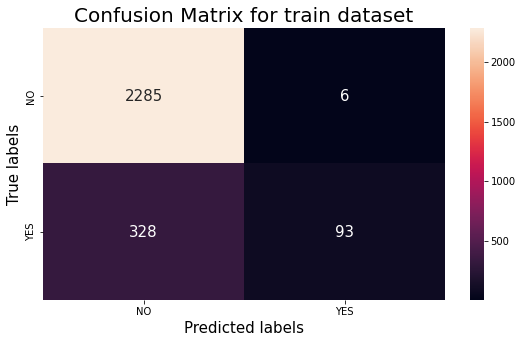

In [231]:
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

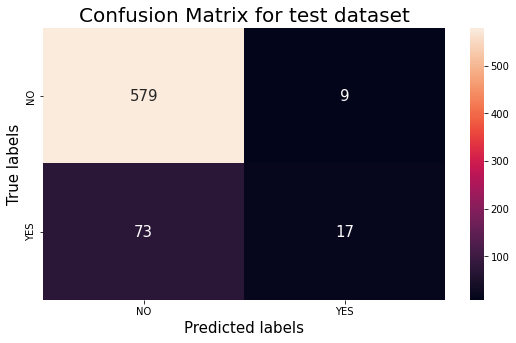

In [232]:
get_confusion_matrix(xgb_bayes_optimal,X_test,y_test,'test')

In [233]:
individual_model_performance(xgb_bayes_optimal, X_train, X_test, y_train, y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.594684                  0.293103
1   Accuracy                   0.910029                  0.879056
2     Recall                   0.425178                  0.188889
3  Precision                   0.988950                  0.653846
4   log_loss                   3.107472                  4.177267
5    roc_auc                   0.712153                  0.586791

In [234]:
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_train)
xgb_feature_importance

Feature  Feature Importance
0           glucose               0.127
1               sex               0.126
2               age               0.111
3          diabetes               0.107
4      prevalentHyp               0.084
5             avgBP               0.071
6        is_smoking               0.060
7         education               0.056
8           totChol               0.056
9               BMI               0.055
10        heartRate               0.054
11  prevalentStroke               0.051
12           BPMeds               0.043

### Model Interpretation

#### Functions for shap plots


In [235]:
def get_force_plot_for1ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means shape values for class 0 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0]) 
  return plot

In [236]:
def get_force_plot_for100ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[:100])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100]) 
  return plot

In [237]:
def get_summary_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance)

In [238]:
 def get_summary_bar_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, plot_type='bar') 

#### Force Plot - to view features contribution in prediction at local level

a) Force plot for 1 observation

In [239]:
get_force_plot_for1ob_BT(xgb_bayes_optimal,X_test)

b) Force plot of 100 observations

In [240]:
get_force_plot_for100ob_BT(xgb_bayes_optimal,X_test)

#### Summary Plot - Impact of features on predictions at global level

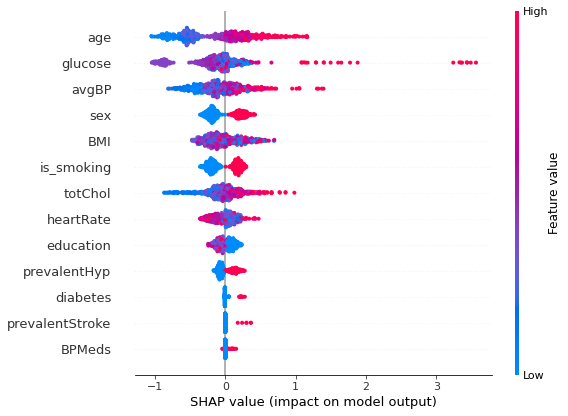

In [241]:
get_summary_plot_BT(xgb_bayes_optimal,X_test)

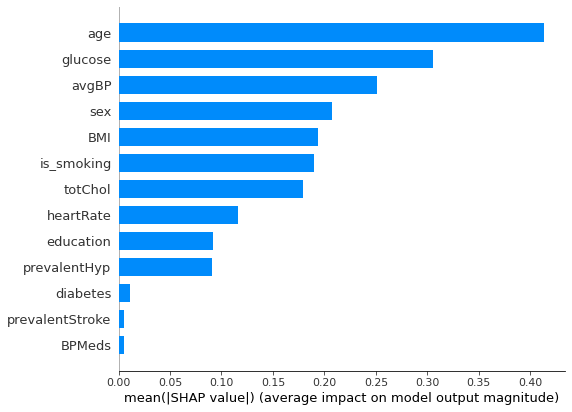

In [242]:
get_summary_bar_plot_BT(xgb_bayes_optimal,X_test)

## <b><u>Support vector machine model

### Without regularization

In [243]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))

ROCAUC score: 0.6837301587301589
Accuracy score: 0.6799410029498525


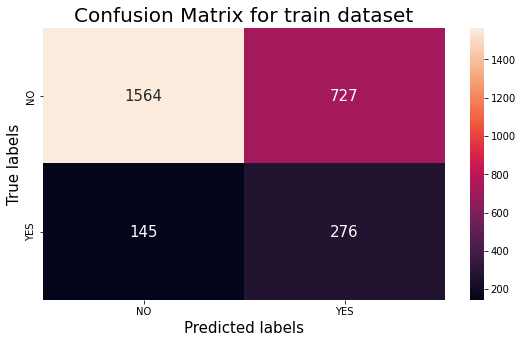

In [244]:
get_confusion_matrix(svc_model,X_train,y_train,'train')

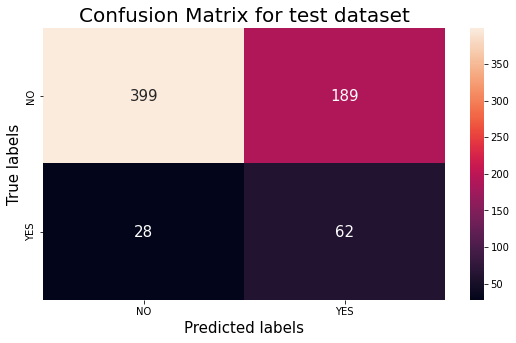

In [245]:
get_confusion_matrix(svc_model,X_test,y_test,'test')

In [246]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_model.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78      2291
           1       0.28      0.66      0.39       421

    accuracy                           0.68      2712
   macro avg       0.60      0.67      0.58      2712
weighted avg       0.82      0.68      0.72      2712



              precision    recall  f1-score   support

           0       0.93      0.68      0.79       588
           1       0.25      0.69      0.36        90

    accuracy                           0.68       678
   macro avg       0.59      0.68      0.57       678
weighted avg       0.84      0.68      0.73       678



### Best SVM model

In [260]:
start = time. time()

# Create an instance of the RandomForestClassifier
svm = SVC(class_weight='balanced', probability=True)

# Grid search
svm_bayes= BayesSearchCV(estimator=svm,
                       search_spaces = {'kernel':['linear','rbf'],'C': (0.0001,10),
                                    'gamma': (0.1,1)}, n_iter=50,
                       cv = 4, verbose=2, scoring='recall')
# Fit the data
svm_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END C=6.76036072508705, gamma=0.25352948705278844, kernel=linear; total time=   1.8s
[CV] END C=6.76036072508705, gamma=0.25352948705278844, kernel=linear; total time=   1.6s
[CV] END C=6.76036072508705, gamma=0.25352948705278844, kernel=linear; total time=   1.7s
[CV] END C=6.76036072508705, gamma=0.25352948705278844, kernel=linear; total time=   2.0s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END C=5.214002743662473, gamma=0.8019965624056344, kernel=rbf; total time=   3.9s
[CV] END C=5.214002743662473, gamma=0.8019965624056344, kernel=rbf; total time=   4.2s
[CV] END C=5.214002743662473, gamma=0.8019965624056344, kernel=rbf; total time=   4.0s
[CV] END C=5.214002743662473, gamma=0.8019965624056344, kernel=rbf; total time=   3.4s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END C=8.213033678721112, gamma=0.7032755982945068, kernel=rbf; total time=   3.6s
[CV] END C=8.213033678721112

In [261]:
svm_bayes.best_estimator_

SVC(C=10.0, class_weight='balanced', gamma=0.1, kernel='linear',
    probability=True)

In [262]:
svc_bayes_optimal = svm_bayes.best_estimator_

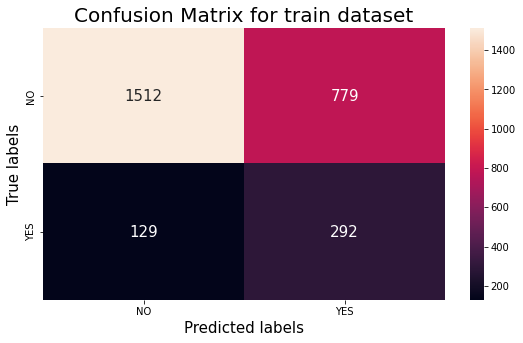

In [263]:
get_confusion_matrix(svc_bayes_optimal,X_train,y_train,'train')

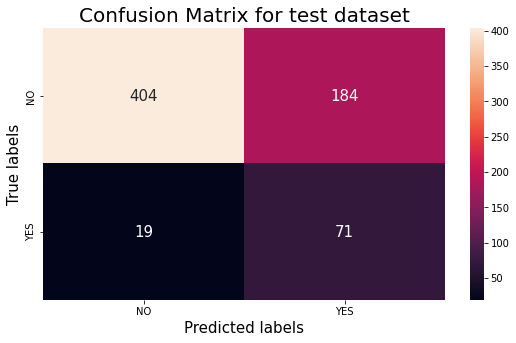

In [264]:
get_confusion_matrix(svc_bayes_optimal,X_test,y_test,'test')

In [265]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_bayes_optimal.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_bayes_optimal.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      2291
           1       0.27      0.69      0.39       421

    accuracy                           0.67      2712
   macro avg       0.60      0.68      0.58      2712
weighted avg       0.82      0.67      0.71      2712



              precision    recall  f1-score   support

           0       0.96      0.69      0.80       588
           1       0.28      0.79      0.41        90

    accuracy                           0.70       678
   macro avg       0.62      0.74      0.61       678
weighted avg       0.87      0.70      0.75       678



In [266]:
feature_coefficients(svc_bayes_optimal,X_train)

Features      Coef  Absolute coef
0           glucose  5.944202       5.944202
1               age  2.936837       2.936837
2         education -2.071247       2.071247
3             avgBP  1.621149       1.621149
4           totChol  1.455587       1.455587
5               BMI  1.038525       1.038525
6          diabetes -0.779953       0.779953
7            BPMeds -0.725539       0.725539
8         heartRate -0.583805       0.583805
9        is_smoking  0.504594       0.504594
10  prevalentStroke  0.503148       0.503148
11              sex  0.423257       0.423257
12     prevalentHyp  0.315848       0.315848

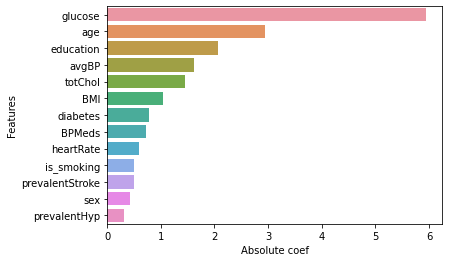

In [267]:
sns.barplot(x='Absolute coef',y='Features',data=feature_coefficients(svc_bayes_optimal,X_train))

# <b><u>Model Comparison based on performance

##function format : models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test)

In [268]:
# Get the accuracy score for the model
def models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test):
  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
  # Initialize the variables
  roc_auc , accuracy , precision , recall ,logloss , fscore = [],[],[],[],[],[]
  for model_name in model_list:
    # Get the predicted classes
    train_class_preds = model_name.predict(X_train)
    test_class_preds = model_name.predict(X_test)

    # Get test scores
    fscore.append((round(f1_score(y_train,train_class_preds),3) ,round(f1_score(y_test, test_class_preds),3)))
    accuracy.append((round(accuracy_score(y_train,train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3)))
    recall.append((round(recall_score(y_train,train_class_preds),3), round(recall_score(y_test, test_class_preds),3)))
    precision.append((round(precision_score(y_train,train_class_preds),3), round(precision_score(y_test, test_class_preds),3)))
    logloss.append((round(log_loss(y_train,train_class_preds),3),round(log_loss(y_test, test_class_preds),3)))
    roc_auc.append((round(roc_auc_score(y_train,train_class_preds),3), round(roc_auc_score(y_test, test_class_preds),3)))

  # Prepare a metric dataframe
  model_comparison = pd.DataFrame(list(zip(model_name_list,roc_auc,accuracy,precision,recall,logloss,fscore)), columns = ['Model_Name','roc_auc_score','Accuracy_score','Precision_score','Recall_score','log_loss','f_score'])
  return model_comparison 

## Get model comparison

In [269]:
model_list = [clf,lasso_bayes_optimal,rf_bayes_optimal, xgb_bayes_optimal,svc_bayes_optimal]
model_name_list = ['Logistic regression model','Logistic Lasso model','Random forest model', 'XG boosted tress model', 'Support vector machine model']

In [270]:
models_comparison(model_list, model_name_list, X_train, X_test, y_train, y_test)

Model_Name   roc_auc_score  Accuracy_score  \
0     Logistic regression model   (0.526, 0.53)    (0.85, 0.87)   
1          Logistic Lasso model  (0.536, 0.538)   (0.85, 0.869)   
2           Random forest model  (0.609, 0.577)  (0.877, 0.879)   
3        XG boosted tress model  (0.712, 0.587)   (0.91, 0.879)   
4  Support vector machine model  (0.677, 0.738)  (0.665, 0.701)   

  Precision_score    Recall_score          log_loss         f_score  
0    (0.742, 0.6)  (0.055, 0.067)    (5.171, 4.483)   (0.102, 0.12)  
1  (0.642, 0.533)  (0.081, 0.089)    (5.171, 4.534)  (0.143, 0.152)  
2  (0.939, 0.682)  (0.221, 0.167)    (4.254, 4.177)  (0.358, 0.268)  
3  (0.989, 0.654)  (0.425, 0.189)    (3.107, 4.177)  (0.595, 0.293)  
4  (0.273, 0.278)  (0.694, 0.789)  (11.564, 10.341)  (0.391, 0.412)

### **From above table, we can conclude that Data is very noisy** 

Accuracy is misleading, Recall is an important metric here, None of the models is working.

##Maybe if I can reduce the noise, resample the data, I might get better results...





# <b><u>Resampling data


* In ths case, we have a very small dataset with no definite pattern. Hence, the model I built are not accurate enough to.
* In such case, its important to restructure the data in favor of minority.
* I will be using feature importances from support vector machine model and XGBoost model.
* Keeping extremes for target =1 will be the main logic. We will be treating top 7 features for that
* Making use of reasearch topics on cardiovascular risk.

In [271]:
df_res = df.copy()

In [272]:
df_res.head()

age  education  sex  is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
1   36        4.0    1           0     0.0                0             1   
2   46        1.0    0           1     0.0                0             0   
3   50        1.0    1           1     0.0                0             1   
4   64        1.0    0           1     0.0                0             0   
5   61        3.0    0           0     0.0                0             1   

   diabetes  totChol    BMI  heartRate  glucose  Target   avgBP  
1         0    212.0  29.77       72.0     75.0       0  133.00  
2         0    250.0  20.35       88.0     94.0       0   93.50  
3         0    233.0  28.26       68.0     94.0       1  123.00  
4         0    241.0  26.42       70.0     77.0       0  110.75  
5         0    272.0  32.80       85.0     65.0       1  151.50

In [273]:
df_res['Target'].value_counts()

0    2879
1     511
Name: Target, dtype: int64

##Risk Factors: Hypertension, blood chlorestrol, BMI, smoking, age

In [276]:
print('% impact by the features')
for col in df_res.columns[2:]:
  if len(df_res[col].unique())<20:
    print(f"{col} : {df_res[(df_res[col]==1) & (df_res['Target']==1)].shape[0]*100/df_res[df_res[col]==1].shape[0]}")

% impact by the features
sex : 18.541240627130197
is_smoking : 16.301126259632483
BPMeds : 31.932773109243698
prevalentStroke : 45.45454545454545
prevalentHyp : 23.854069223573433
diabetes : 37.93103448275862
Target : 100.0


Expecting a good attitude towards health from a person having one of the risk indication in history but not any currently.

#### As we age, our hearts tend not to work as well. The heart’s walls may thicken and arteries may stiffen and harden, making the heart less able to pump blood to the muscles of the body. Because of these changes, the risk of developing cardiovascular disease increases with age. 
A person can be very healty still die of heart attack due to age

#### Setting boundaries

In [67]:
df.head()

age  education  sex  is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
1   36        4.0    1           0     0.0                0             1   
2   46        1.0    0           1     0.0                0             0   
3   50        1.0    1           1     0.0                0             1   
4   64        1.0    0           1     0.0                0             0   
5   61        3.0    0           0     0.0                0             1   

   diabetes  totChol  BMI  heartRate  glucose  Target  avgBP  
1         0        0    0          0        0       0      1  
2         0        1    0          0        0       0      0  
3         0        0    0          0        0       1      1  
4         0        1    0          0        0       0      0  
5         0        1    1          0        0       1      1

In [68]:
age = df_res[df_res['age']>=60] # then target =1 definite
age['Target'].value_counts()

0    398
1    159
Name: Target, dtype: int64

In [69]:
age['Target'] =1

In [81]:
stroke = df[(df['prevalentStroke']==1) & (df['Target']==0)]
stroke['Target'] =1 

In [84]:
df_os = pd.concat([df, age,stroke])
df_os = df_os.drop_duplicates(subset=[ 'age',	'education' , 'sex', 	'is_smoking', 	'BPMeds' ,	'prevalentStroke', 	'prevalentHyp', 	'diabetes', 	'totChol', 'BMI', 	'heartRate','glucose','avgBP'], keep='last', inplace=False, ignore_index=False)
df_os.shape

(1984, 14)

In [ ]:
risky_features = ['is_smoking','BPMeds','prevalentStroke','totChol','BMI','heartRate','glucose','avgBP']

In [85]:
def risk_dfs(df_temp1):
  top = ['BPMeds','glucose']
  for col in top:
    b = df_temp1[(df_temp1['age']>55) & (df_temp1[col]==1) & (df_temp1['Target']==0)]
    b['Target'] = 1
    df_temp2 = pd.concat([df_temp1,b])
  df_temp2.drop_duplicates(subset=[ 'age',	'education' , 'sex', 	'is_smoking', 	'BPMeds' ,	'prevalentStroke', 	'prevalentHyp', 	'diabetes', 	'totChol', 'BMI', 	'heartRate','glucose','avgBP'], keep='last', inplace=False, ignore_index=False)
  
  risky_features = ['is_smoking','totChol','BMI','heartRate','avgBP']
  n=0
  for col_1 in risky_features:
    n=1
    for col_2 in risky_features:
      if col_1!=col_2:        
        a = df_temp2[(df['age']>55) & (df_temp2[col_1]==1) & (df_temp2[col_2]==1) & (df_temp2['Target']==0)]
        a['Target'] = 1
        a.reset_index(drop=True)
        df_temp2 = pd.concat([df_temp2,a])
        n+=1   
        if n==len(risky_features)-1:
          try:
            risky_features = risky_features[1:] 
            df_new = df_temp2.drop_duplicates(subset=[ 'age',	'education' , 'sex', 	'is_smoking', 	'BPMeds' ,	'prevalentStroke', 	'prevalentHyp', 	'diabetes', 	'totChol', 'BMI', 	'heartRate','glucose','avgBP'], keep='last', inplace=True, ignore_index=False)
          except:
            return df_new

  return df_new

In [86]:
df_half_ready = risk_dfs(df)
df_half_ready['Target'].value_counts()

ValueError: ignored

#### Oversampling the dataframe

In [ ]:
df_os = pd.concat([df_half_ready, age])
df_os.head()

age  education  sex  is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
0   36        4.0    1           0     0.0                0             1   
1   61        1.0    1           0     0.0                0             1   
2   44        1.0    1           1     0.0                0             0   
3   58        3.0    0           0     0.0                0             1   
4   63        1.0    0           0     0.0                0             1   

   diabetes  totChol  BMI  heartRate  glucose  Target  avgBP  
0         0        0    0          0        0       0      1  
1         0        0    0          0        0       0      1  
2         0        0    0          0        0       0      1  
3         0        0    1          0        0       0      1  
4         0        0    0          0        0       0      1

In [ ]:
df_os.duplicated().sum()

452

In [ ]:
df_os.drop_duplicates(subset=[ 'age',	'education' , 'sex', 	'is_smoking', 	'BPMeds' ,	'prevalentStroke', 	'prevalentHyp', 	'diabetes', 	'totChol', 'BMI', 	'heartRate','glucose','avgBP','Target'], keep='last', inplace=False, ignore_index=True)['Target'].value_counts()

0    1677
1    1355
Name: Target, dtype: int64

In [ ]:
# Creating a new dataframe having over sampled data upto 50% in favor of minority
df_new = df_os.drop_duplicates(subset=[ 'age',	'education' , 'sex', 	'is_smoking', 	'BPMeds' ,	'prevalentStroke', 	'prevalentHyp', 	'diabetes', 	'totChol', 'BMI', 	'heartRate','glucose','avgBP','Target'], keep='last', inplace=False, ignore_index=True)
df_new.head()

age  education  sex  is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
0   36        4.0    1           0     0.0                0             1   
1   61        1.0    1           0     0.0                0             1   
2   44        1.0    1           1     0.0                0             0   
3   58        3.0    0           0     0.0                0             1   
4   63        1.0    0           0     0.0                0             1   

   diabetes  totChol  BMI  heartRate  glucose  Target  avgBP  
0         0        0    0          0        0       0      1  
1         0        0    0          0        0       0      1  
2         0        0    0          0        0       0      1  
3         0        0    1          0        0       0      1  
4         0        0    0          0        0       0      1

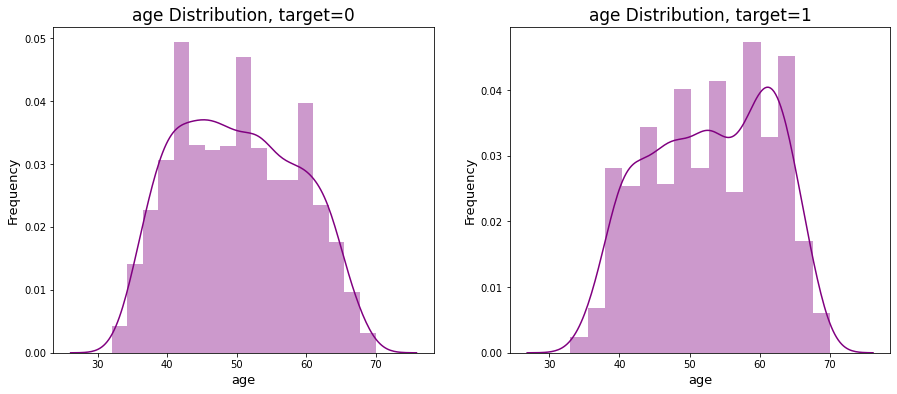

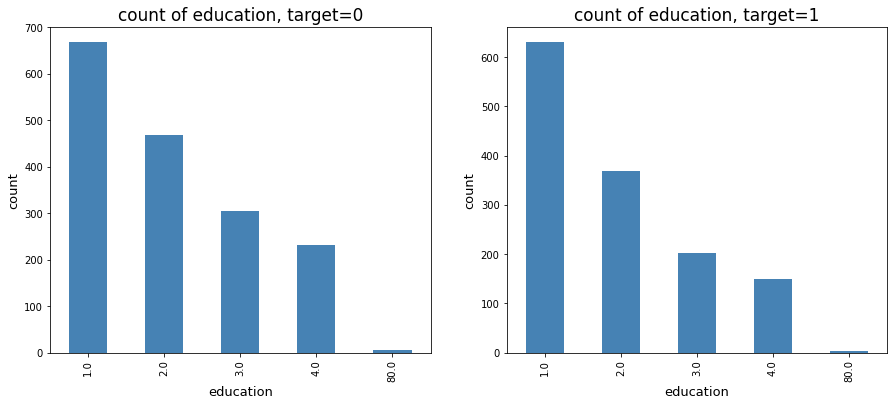

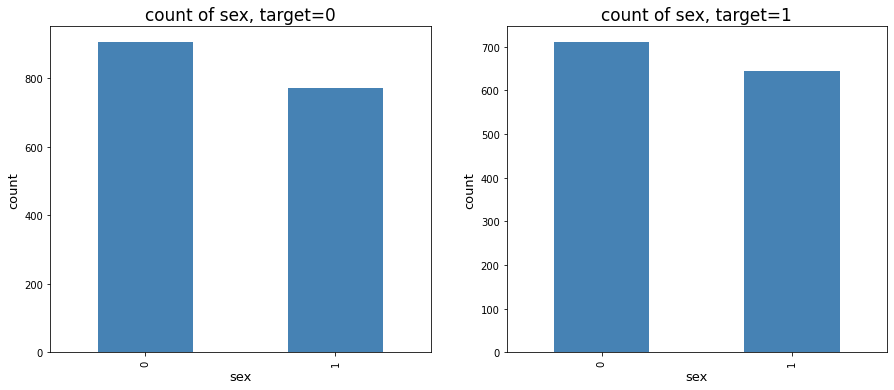

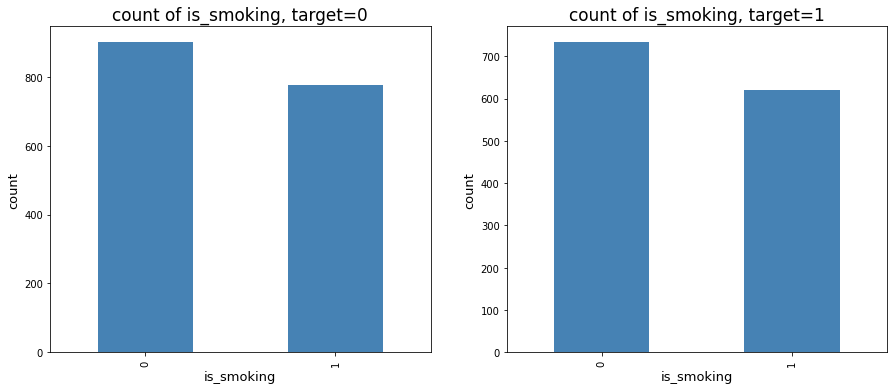

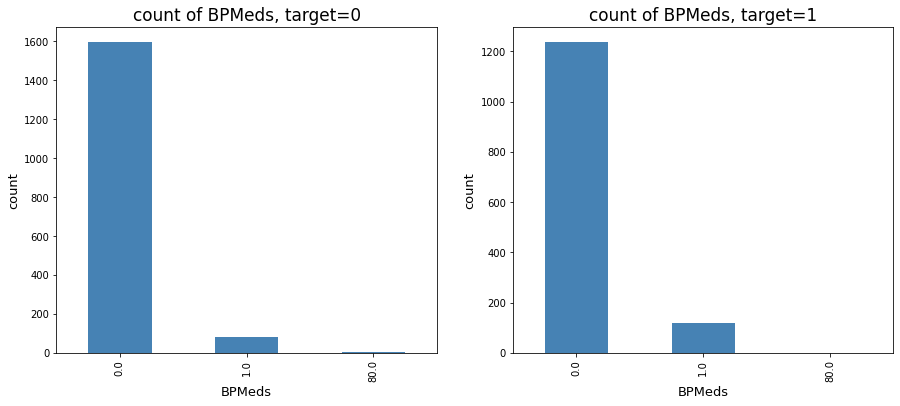

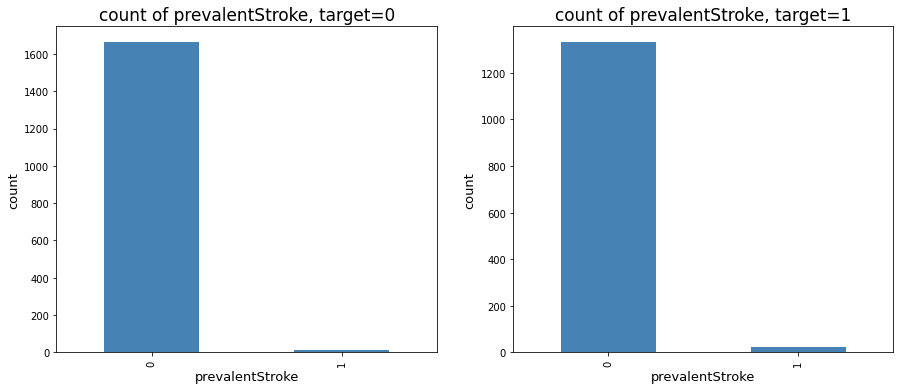

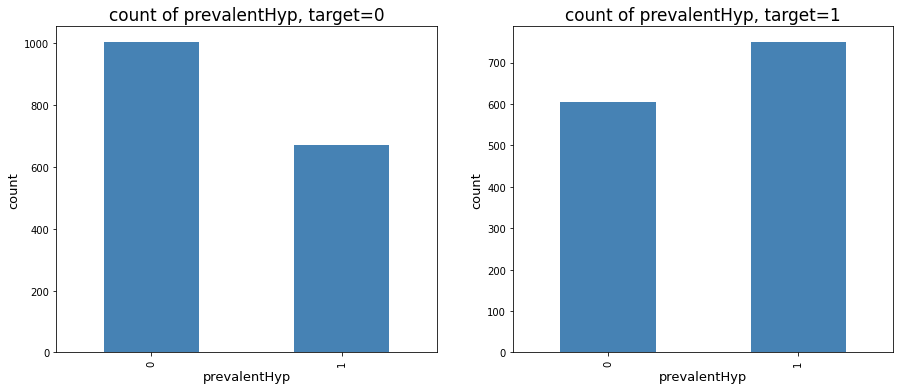

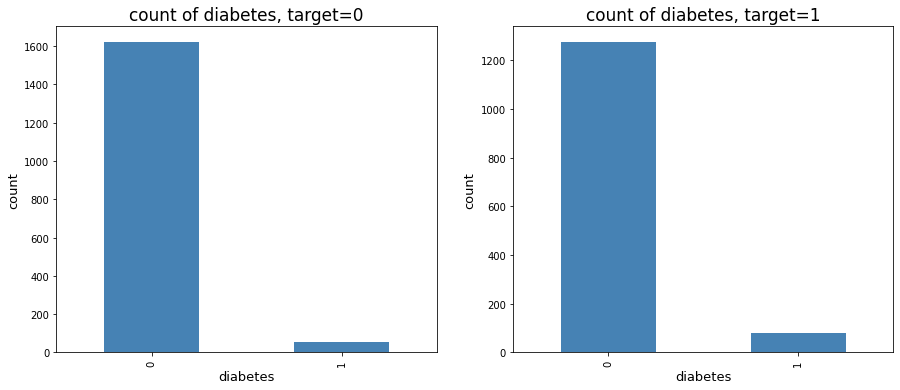

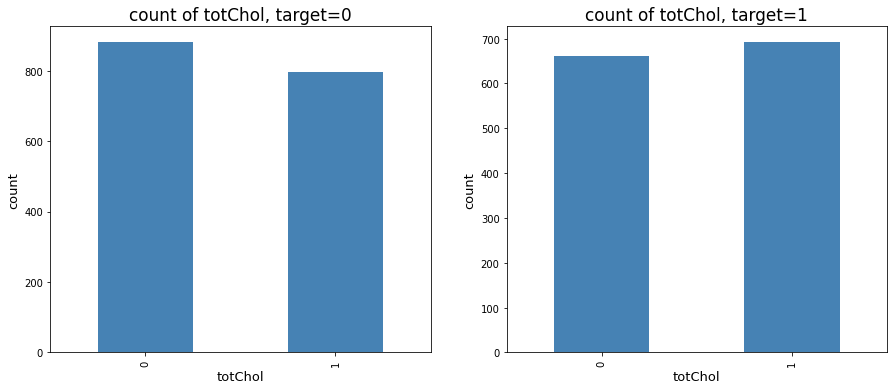

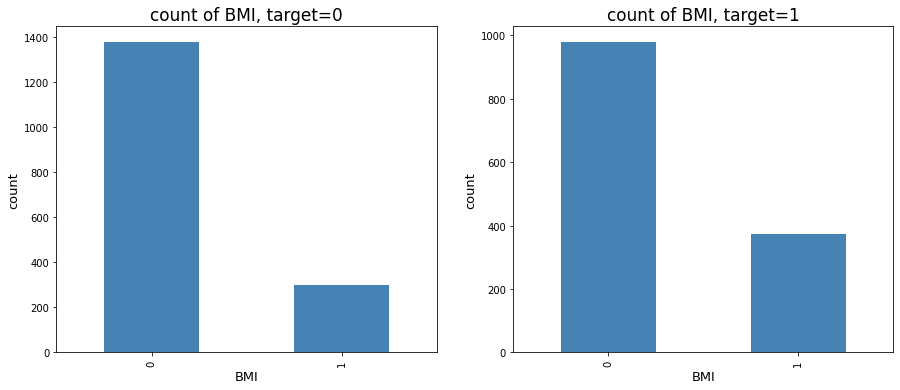

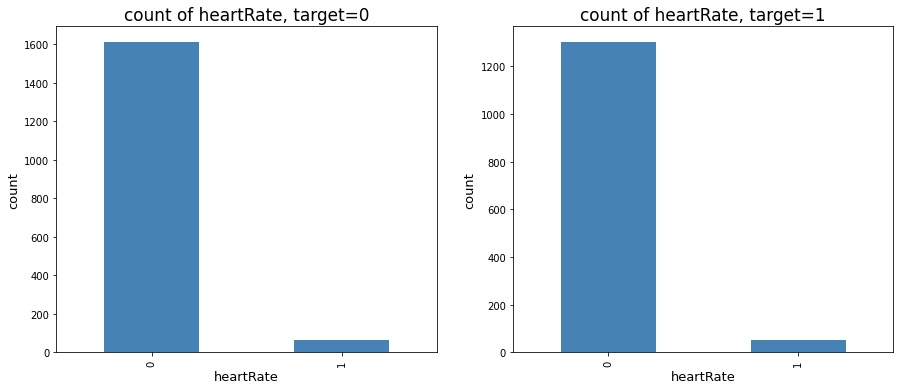

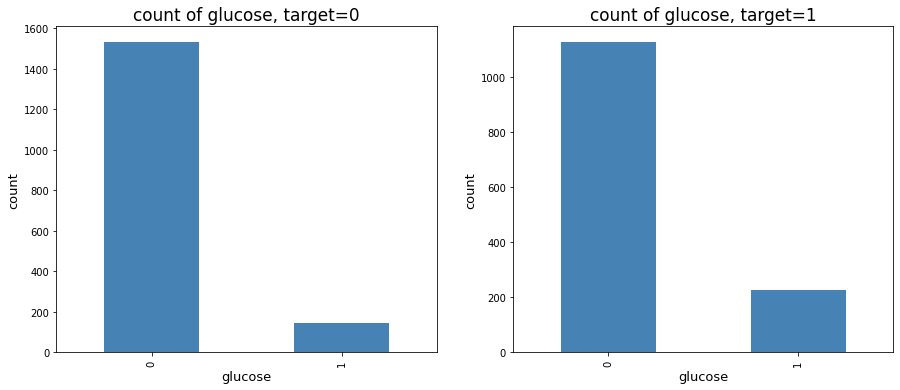

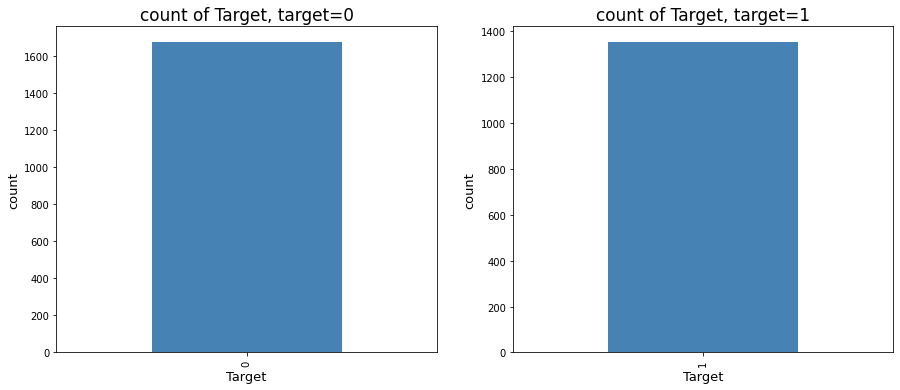

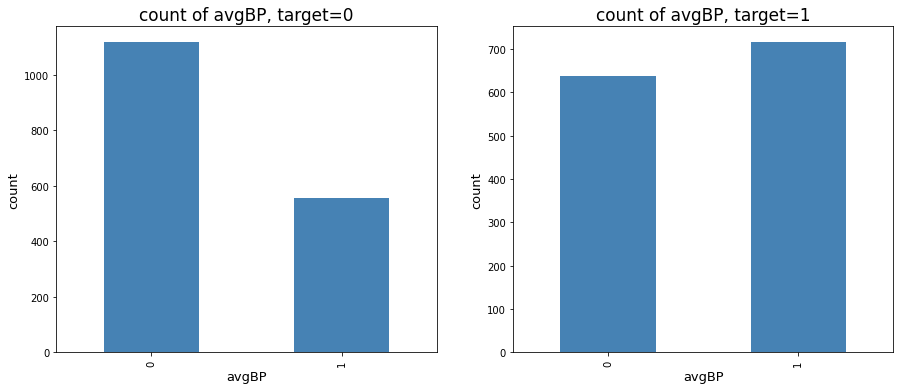

In [ ]:
get_target_comp(df0=df_new[df_new['Target']==0], df1=df_new[df_new['Target']==1])

# <b><u>Build ML models

## Pre-processing

###train_test_split

In [ ]:
df_new.head()

age  education  sex  is_smoking  BPMeds  prevalentStroke  prevalentHyp  \
0   36        4.0    1           0     0.0                0             1   
1   61        1.0    1           0     0.0                0             1   
2   44        1.0    1           1     0.0                0             0   
3   58        3.0    0           0     0.0                0             1   
4   63        1.0    0           0     0.0                0             1   

   diabetes  totChol  BMI  heartRate  glucose  Target  avgBP  
0         0        0    0          0        0       0      1  
1         0        0    0          0        0       0      1  
2         0        0    0          0        0       0      1  
3         0        0    1          0        0       0      1  
4         0        0    0          0        0       0      1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()

In [ ]:
X = pd.DataFrame(scalar.fit_transform(df_new.drop('Target',axis=1)),columns=df_new.drop('Target',axis=1).columns)

y = df_new['Target']

In [ ]:
X.head()

age  education  sex  is_smoking  BPMeds  prevalentStroke  \
0  0.105263   0.037975  1.0         0.0     0.0              0.0   
1  0.763158   0.000000  1.0         0.0     0.0              0.0   
2  0.315789   0.000000  1.0         1.0     0.0              0.0   
3  0.684211   0.025316  0.0         0.0     0.0              0.0   
4  0.815789   0.000000  0.0         0.0     0.0              0.0   

   prevalentHyp  diabetes  totChol  BMI  heartRate  glucose  avgBP  
0           1.0       0.0      0.0  0.0        0.0      0.0    1.0  
1           1.0       0.0      0.0  0.0        0.0      0.0    1.0  
2           0.0       0.0      0.0  0.0        0.0      0.0    1.0  
3           1.0       0.0      0.0  1.0        0.0      0.0    1.0  
4           1.0       0.0      0.0  0.0        0.0      0.0    1.0

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state=0)

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(2425, 13) (2425,)
(607, 13) (607,)


In [ ]:
y_train.value_counts()

0    1334
1    1091
Name: Target, dtype: int64

In [ ]:
y_test.value_counts()

0    343
1    264
Name: Target, dtype: int64

### Importing all the libraries needed

In [ ]:
# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [ ]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

In [ ]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

In [ ]:
from skopt import BayesSearchCV
import time
import shap

### Creating functions to reduce number of lines of code

#### individual_model_performance(model_name,X_train,X_test,y_train,y_test)

In [ ]:
# Get the accuracy score for the model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

#### get_confusion_matrix(model_name, X_train, X_test, y_train, y_test)

In [ ]:
# Get the confusion matrix for both train and test
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

## <b><u>Logistic regression model 

### WIthout regularization

In [ ]:
# Fitting the LogisticRegression on train data
clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.6144329896907217, 0.6227347611202636)

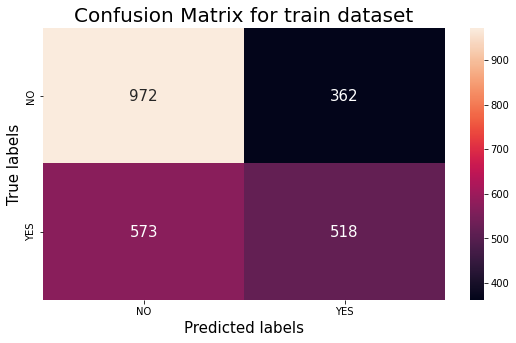

In [ ]:
get_confusion_matrix(clf,X_train,y_train,'train')

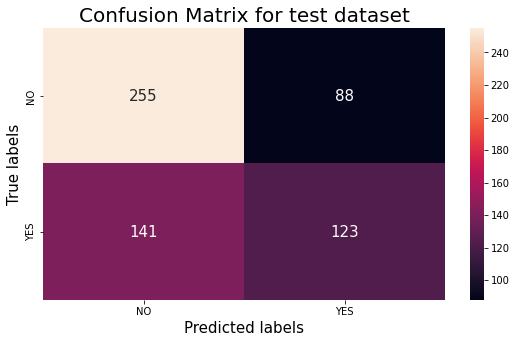

In [ ]:
get_confusion_matrix(clf,X_test,y_test,'test')

In [ ]:
clf.intercept_

array([-1.63947511])

In [ ]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Target',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Absolute coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [ ]:
feature_coefficients(clf,X_train)

Features      Coef  Absolute coef
0               age  1.155449       1.155449
1           glucose  1.155271       1.155271
2             avgBP  0.776970       0.776970
3               BMI  0.747671       0.747671
4   prevalentStroke  0.557534       0.557534
5         education -0.226673       0.226673
6               sex  0.200407       0.200407
7            BPMeds -0.183575       0.183575
8          diabetes -0.161687       0.161687
9           totChol  0.112999       0.112999
10       is_smoking  0.089449       0.089449
11        heartRate -0.040803       0.040803
12     prevalentHyp  0.019405       0.019405

In [ ]:
# Get model performance using function I built, model_performance
individual_model_performance(clf,X_train,X_test,y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.525622                  0.517895
1   Accuracy                   0.614433                  0.622735
2     Recall                   0.474794                  0.465909
3  Precision                   0.588636                  0.582938
4   log_loss                  13.317132                 13.030396
5    roc_auc                   0.601715                  0.604675

### With lasso regularization

In [ ]:
start = time. time()

lasso = LogisticRegression(penalty='l1',solver='liblinear', fit_intercept=True, max_iter=10000)

lasso_bayes = BayesSearchCV(estimator=lasso, search_spaces={'C':(0.0001,10)}, n_iter=30, cv = 3, verbose=2, scoring='recall')

# Fit the data
lasso_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...............................C=1.9448442677374058; total time=   0.0s
[CV] END ...............................C=1.9448442677374058; total time=   0.0s
[CV] END ...............................C=1.9448442677374058; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...............................C=3.6574555547967105; total time=   0.0s
[CV] END ...............................C=3.6574555547967105; total time=   0.0s
[CV] END ...............................C=3.6574555547967105; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ................................C=6.215251283950298; total time=   0.0s
[CV] END ................................C=6.215251283950298; total time=   0.0s
[CV] END ................................C=6.215251283950298; total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ..........................

In [ ]:
lasso_bayes.best_estimator_

LogisticRegression(C=7.646806166954705, max_iter=10000, penalty='l1',
                   solver='liblinear')

In [ ]:
lasso_bayes_optimal = lasso_bayes.best_estimator_

#### Performance check

In [ ]:
lasso_bayes_optimal.score(X_train,y_train), lasso_bayes_optimal.score(X_test,y_test)

(0.9027283511269276, 0.8886255924170616)

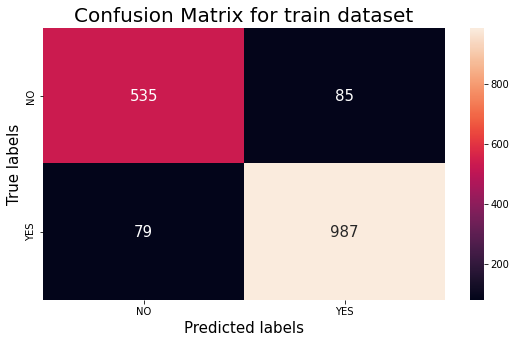

In [ ]:
get_confusion_matrix(lasso_bayes_optimal,X_train,y_train,'train')

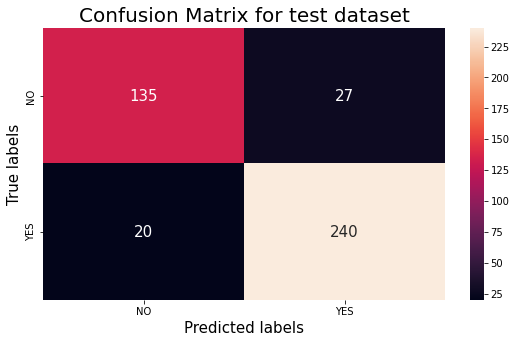

In [ ]:
get_confusion_matrix(lasso_bayes_optimal,X_test,y_test,'test')

In [ ]:
feature_coefficients(lasso_bayes_optimal,X_train)

Features       Coef  Absolute coef
0            BPMeds  65.652633      65.652633
1         heartRate   4.284141       4.284141
2           glucose   4.283869       4.283869
3               age   4.270800       4.270800
4               BMI   3.875020       3.875020
5        is_smoking   3.718738       3.718738
6           totChol   3.710172       3.710172
7             avgBP   3.609918       3.609918
8   prevalentStroke   2.724738       2.724738
9         education   0.955166       0.955166
10         diabetes  -0.687154       0.687154
11     prevalentHyp   0.289308       0.289308
12              sex   0.148330       0.148330

In [ ]:
# Get model performance using function I built, model_performance
individual_model_performance(lasso_bayes_optimal,X_train,X_test,y_train,y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.923293                  0.910816
1   Accuracy                   0.902728                  0.888626
2     Recall                   0.925891                  0.923077
3  Precision                   0.920709                  0.898876
4   log_loss                   3.359684                  3.846787
5    roc_auc                   0.894397                  0.878205

## <b><u>Random Forest Classifier model

### Training a Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(max_depth=25, min_samples_leaf=10,min_samples_split=10,n_jobs=2)
rf_model.fit(X_train,y_train)
clf.score(X_train, y_train) , clf.score(X_test, y_test)

(0.8997627520759194, 0.8838862559241706)

In [ ]:
start = time. time()

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
# Grid search
rf_bayes= BayesSearchCV(estimator=rf_model,
                       search_spaces = {'max_depth': (5,25),
                                    'min_samples_leaf': (5,150),
                                    'min_samples_split': (5,150)}, n_iter=50,
                       cv = 3, verbose=2, scoring='recall',random_state=0)
# Fit the data
rf_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=16, min_samples_leaf=103, min_samples_split=95; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=103, min_samples_split=95; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=103, min_samples_split=95; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=10, min_samples_leaf=147, min_samples_split=137; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=147, min_samples_split=137; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=147, min_samples_split=137; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=16, min_samples_leaf=13, min_samples_split=55; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=13, min_samples_split=55; total time=   0.2s
[CV] END max_depth=16, min_samples_leaf=13, min_samples_split=55; total time=   0.2s
Fitting 3 folds for each of 1 candidates, totalli

In [ ]:
rf_bayes.best_estimator_

RandomForestClassifier(max_depth=24, min_samples_leaf=150,
                       min_samples_split=139)

In [ ]:
rf_bayes_optimal = rf_bayes.best_estimator_

### Performance check

In [ ]:
rf_bayes_optimal.score(X_train,y_train),rf_bayes_optimal.score(X_test,y_test)

(0.7591933570581257, 0.7488151658767772)

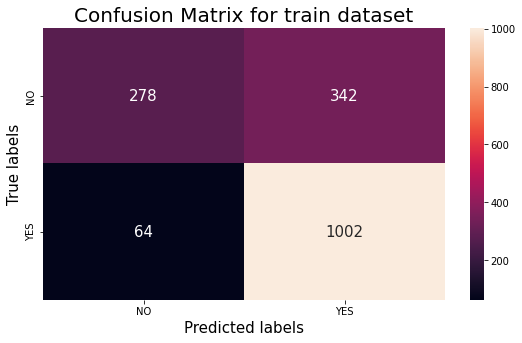

In [ ]:
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

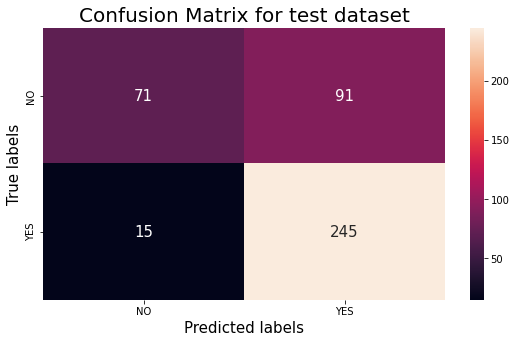

In [ ]:
get_confusion_matrix(rf_bayes_optimal,X_test,y_test,'test')

In [ ]:
individual_model_performance(rf_bayes_optimal, X_train, X_test, y_train, y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.831535                  0.822148
1   Accuracy                   0.759193                  0.748815
2     Recall                   0.939962                  0.942308
3  Precision                   0.745536                  0.729167
4   log_loss                   8.317329                  8.675789
5    roc_auc                   0.694175                  0.690290

In [ ]:
def get_feature_importance(model_name,X_train):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : df.drop('Target',axis=1).columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [ ]:
rf_feature_importance = get_feature_importance(rf_bayes_optimal,X_train)
rf_feature_importance

Feature  Feature Importance
0       totChol               0.318
1         avgBP               0.238
2    is_smoking               0.179
3  prevalentHyp               0.117
4           age               0.072
5           BMI               0.060
6     education               0.013
7           sex               0.004

### Model Interpretation

#### Summary Plot - Impact of features on predictions at global level

In [ ]:
def get_summary_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance)

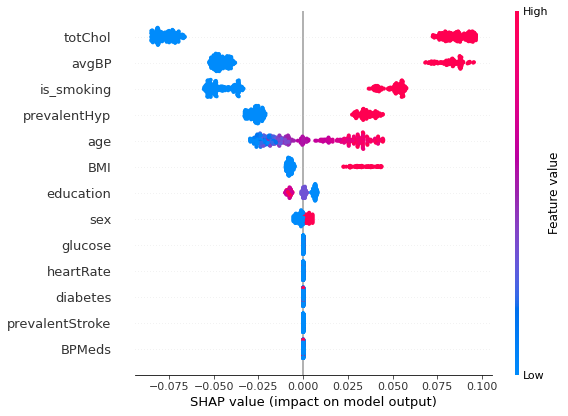

In [ ]:
get_summary_plot(rf_bayes_optimal,X_test)

In [ ]:
 def get_summary_bar_plot(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values[1], X_importance, plot_type='bar') 

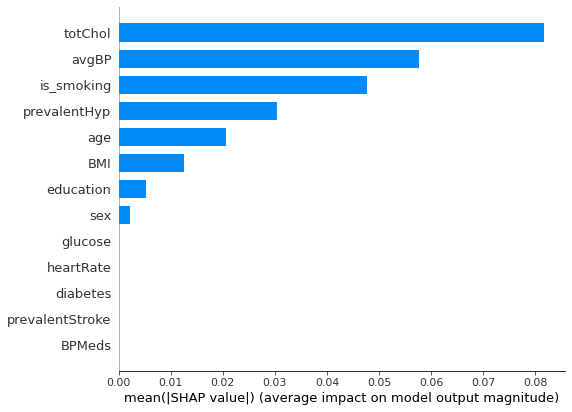

In [ ]:
get_summary_bar_plot(rf_bayes_optimal,X_test)

## <b><u>XGBClassifier model

### Training a XGB Classifier

In [ ]:
start = time. time()

# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(subsample=0.9, colsample_bytree =0.4,random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'max_depth': (5,25),
                                    'min_samples_weight': (0.9,1),
                                    'reg_alpha':(0.1,10), 'gamma':(0.1,1)}, n_iter=50,
                       cv = 4, verbose=2, scoring='recall',random_state=0)
# Fit the data
xgb_bayes.fit(X_train,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.5778677484569327, max_depth=19, min_samples_weight=0.9622709752629437, reg_alpha=6.502131416609406; total time=   0.2s
[CV] END gamma=0.5778677484569327, max_depth=19, min_samples_weight=0.9622709752629437, reg_alpha=6.502131416609406; total time=   0.1s
[CV] END gamma=0.5778677484569327, max_depth=19, min_samples_weight=0.9622709752629437, reg_alpha=6.502131416609406; total time=   0.1s
[CV] END gamma=0.5778677484569327, max_depth=19, min_samples_weight=0.9622709752629437, reg_alpha=6.502131416609406; total time=   0.1s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.33253449577547334, max_depth=25, min_samples_weight=0.9908438373669974, reg_alpha=6.0334856928085125; total time=   0.1s
[CV] END gamma=0.33253449577547334, max_depth=25, min_samples_weight=0.9908438373669974, reg_alpha=6.0334856928085125; total time=   0.1s
[CV] END gamma=0.33253449577547334, max_depth=25, min_samples_

In [ ]:
xgb_bayes.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=1.0, max_depth=9,
              min_samples_weight=0.9, reg_alpha=1.8679700349300532,
              subsample=0.9)

In [ ]:
xgb_bayes_optimal = xgb_bayes.best_estimator_

### Performance check

In [ ]:
xgb_bayes_optimal.score(X_train,y_train),xgb_bayes_optimal.score(X_test,y_test)

(0.9145907473309609, 0.8981042654028436)

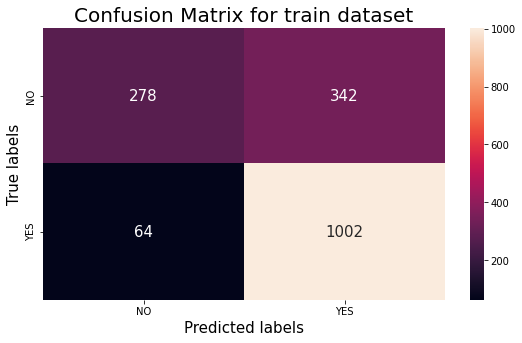

In [ ]:
get_confusion_matrix(rf_bayes_optimal,X_train,y_train,'train')

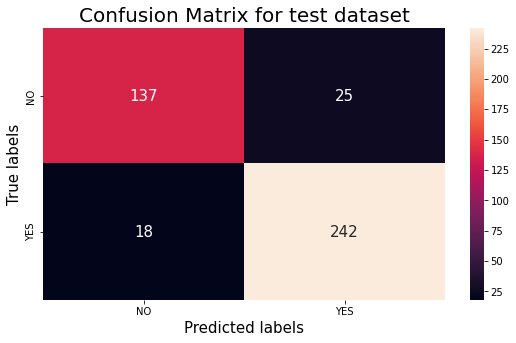

In [ ]:
get_confusion_matrix(xgb_bayes_optimal,X_test,y_test,'test')

In [ ]:
individual_model_performance(xgb_bayes_optimal, X_train, X_test, y_train, y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.932267                  0.918406
1   Accuracy                   0.914591                  0.898104
2     Recall                   0.929644                  0.930769
3  Precision                   0.934906                  0.906367
4   log_loss                   2.949964                  3.519401
5    roc_auc                   0.909177                  0.888224

In [ ]:
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_train)
xgb_feature_importance

Feature  Feature Importance
0        totChol               0.197
1     is_smoking               0.193
2          avgBP               0.179
3   prevalentHyp               0.124
4            BMI               0.066
5        glucose               0.062
6            age               0.056
7         BPMeds               0.045
8      heartRate               0.031
9      education               0.016
10           sex               0.016
11      diabetes               0.015

### Model Interpretation

#### Functions for shap plots


In [ ]:
def get_force_plot_for1ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[0])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means shape values for class 0 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[0]) 
  return plot

In [ ]:
def get_force_plot_for100ob_BT(model_name,X_test):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model_name)
  # obtain shap values for the first row of the test data
  shap_values = explainer.shap_values(X_test.iloc[:100])

  # explainer.expected_value[0] means mean probability for 0,  shap_values[0] means 
  plot = shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:100]) 
  return plot

In [ ]:
def get_summary_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance)

In [ ]:
 def get_summary_bar_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, plot_type='bar') 

#### Force Plot - to view features contribution in prediction at local level

a) Force plot for 1 observation

In [ ]:
get_force_plot_for1ob_BT(xgb_bayes_optimal,X_test)

b) Force plot of 100 observations

In [ ]:
get_force_plot_for100ob_BT(xgb_bayes_optimal,X_test)

#### Summary Plot - Impact of features on predictions at global level

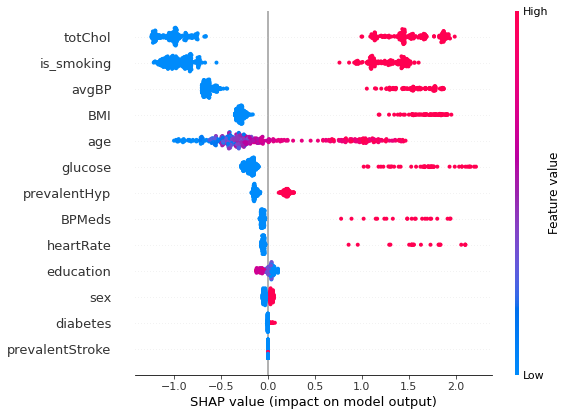

In [ ]:
get_summary_plot_BT(xgb_bayes_optimal,X_test)

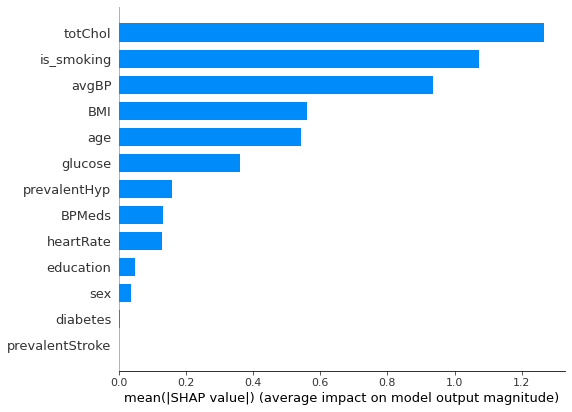

In [ ]:
get_summary_bar_plot_BT(xgb_bayes_optimal,X_test)

## Support vector machine model

### Without regularization

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))

ROCAUC score: 0.8919040835707501
Accuracy score: 0.8696682464454977


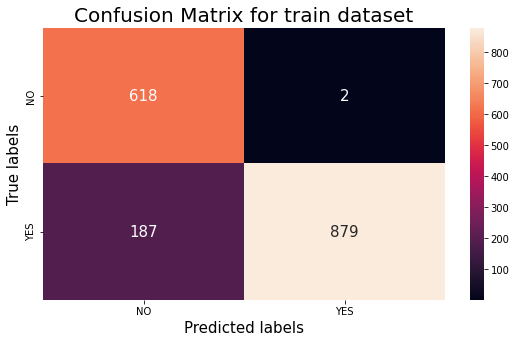

In [ ]:
get_confusion_matrix(svc_model,X_train,y_train,'train')

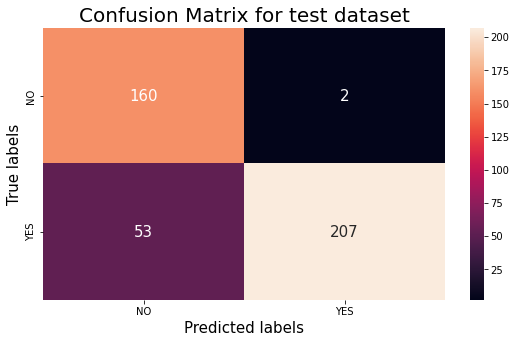

In [ ]:
get_confusion_matrix(svc_model,X_test,y_test,'test')

In [ ]:
from sklearn.metrics import classification_report

# Print the classification report for train and test
print(classification_report(y_train, svc_model.predict(X_train)))
print("\n")
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       620
           1       1.00      0.82      0.90      1066

    accuracy                           0.89      1686
   macro avg       0.88      0.91      0.89      1686
weighted avg       0.91      0.89      0.89      1686



              precision    recall  f1-score   support

           0       0.75      0.99      0.85       162
           1       0.99      0.80      0.88       260

    accuracy                           0.87       422
   macro avg       0.87      0.89      0.87       422
weighted avg       0.90      0.87      0.87       422



In [ ]:
individual_model_performance(svc_model, X_train, X_test, y_train, y_test)

Metric  Performance on Train Data  Performance on Test Data
0    f_score                   0.902928                  0.882729
1   Accuracy                   0.887900                  0.869668
2     Recall                   0.824578                  0.796154
3  Precision                   0.997730                  0.990431
4   log_loss                   3.871785                  4.501503
5    roc_auc                   0.910676                  0.891904

# <b><u>Model Comparison based on performance

##function format : models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test)

In [ ]:
# Get the accuracy score for the model
def models_comparison(model_list,model_name_list,X_train,X_test,y_train,y_test):
  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix
  # Initialize the variables
  roc_auc , accuracy , precision , recall ,logloss , fscore = [],[],[],[],[],[]
  for model_name in model_list:
    # Get the predicted classes
    train_class_preds = model_name.predict(X_train)
    test_class_preds = model_name.predict(X_test)

    # Get test scores
    fscore.append((round(f1_score(y_train,train_class_preds),3) ,round(f1_score(y_test, test_class_preds),3)))
    accuracy.append((round(accuracy_score(y_train,train_class_preds),3),round(accuracy_score(y_test, test_class_preds),3)))
    recall.append((round(recall_score(y_train,train_class_preds),3), round(recall_score(y_test, test_class_preds),3)))
    precision.append((round(precision_score(y_train,train_class_preds),3), round(precision_score(y_test, test_class_preds),3)))
    logloss.append((round(log_loss(y_train,train_class_preds),3),round(log_loss(y_test, test_class_preds),3)))
    roc_auc.append((round(roc_auc_score(y_train,train_class_preds),3), round(roc_auc_score(y_test, test_class_preds),3)))

  # Prepare a metric dataframe
  model_comparison = pd.DataFrame(list(zip(model_name_list,roc_auc,accuracy,precision,recall,logloss,fscore)), columns = ['Model_Name','roc_auc_score','Accuracy_score','Precision_score','Recall_score','log_loss','f_score'])
  return model_comparison 

## Get model comparison

In [ ]:
model_list = [clf,lasso_bayes_optimal,rf_bayes_optimal, xgb_bayes_optimal,svc_model]
model_name_list = ['Logistic regression model','Logistic Lasso model','Random forest model', 'XG boosted tress model', 'Support vector machine model']

In [ ]:
models_comparison(model_list, model_name_list, X_train, X_test, y_train, y_test)

Model_Name   roc_auc_score  Accuracy_score  \
0     Logistic regression model  (0.891, 0.873)    (0.9, 0.884)   
1          Logistic Lasso model  (0.894, 0.878)  (0.903, 0.889)   
2           Random forest model   (0.694, 0.69)  (0.759, 0.749)   
3        XG boosted tress model  (0.909, 0.888)  (0.915, 0.898)   
4  Support vector machine model  (0.911, 0.892)   (0.888, 0.87)   

  Precision_score    Recall_score        log_loss         f_score  
0  (0.918, 0.895)  (0.924, 0.919)   (3.462, 4.01)  (0.921, 0.907)  
1  (0.921, 0.899)  (0.926, 0.923)   (3.36, 3.847)  (0.923, 0.911)  
2  (0.746, 0.729)   (0.94, 0.942)  (8.317, 8.676)  (0.832, 0.822)  
3  (0.935, 0.906)   (0.93, 0.931)   (2.95, 3.519)  (0.932, 0.918)  
4   (0.998, 0.99)  (0.825, 0.796)  (3.872, 4.502)  (0.903, 0.883)

## **From above table, we can conclude that XG boosted model is far superior than the other models.** 
#### 'Logistic regression model' takes least amount of time n the model is easily interpretable but has some assumptions. Not good for real world scenarios.
#### 'Random forest model' took more building time n improved the precision but overall it gave almost same results as logistic regression model did. Also had to use SHAP explainer. It would have been better to invest all that time in XGboosted model.
#### 'Gradient boosted trees model' and 'XG boosted tress model' takes considerably large amount of time when compared to logistic regression model.
#### In this study we used BayesSearchCV based on the results from guided project. One may use RandomSeachCV if they want to save time, the result sometimes may surprise you :).



## **Understand the model using summary plot**
#### Important features to make a prediction are given in following figure. The features are presented in decreasing order of their importance i.e. top feature 'BMI' contributes most in predicting the output response of Insurance decision and its most valuable in most cases.

#### The correlation of the features with the dependent feature can be understood by the domination on right side of 0 on impact axis (X-axis). If most points are blue, like in 'BMI' or 'Wt' then that faeture is negatively correlated with dependent feature. The bulb of red points in case of 'Medical_History_4' feature suggests that it is positively correlated with the dependent feature.

#### The distribution of each feature can also be related. The 'BMI' feature is highly +vely skewed while 'Medical_History_4' feature is -vely skewed but not as skewed as 'BMI' is. 'Ins_Age' and'Family_Hist_3' is uniformly distributed. 

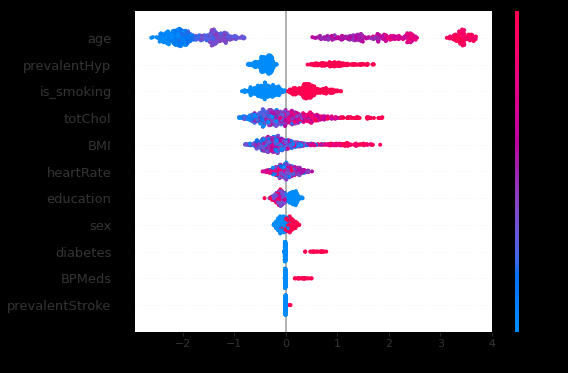

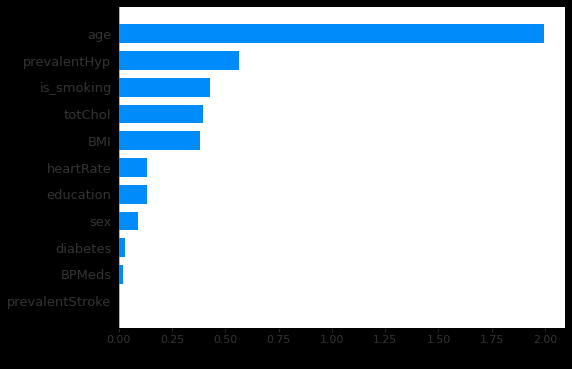

## Oversampling using smote

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['Target'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

In [ ]:
x_smote

In [ ]:
y_smote.value_counts()